<a href="https://colab.research.google.com/github/PrajwalSingh048/Bike_sharing_demand_Regression/blob/main/Bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Project Name - Seoul Bike Sharing Demand Prediction <u><b> 



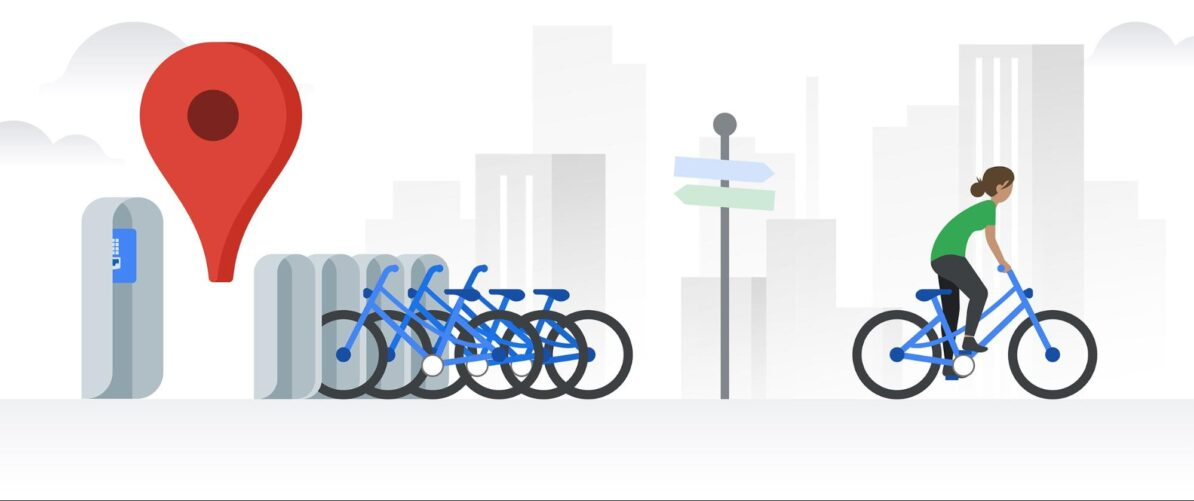

##### **Project Type**  - Supervised Machine learning (Regression Model)
##### **Contribution**  - Individual
##### **Name** - Prajwal Singh


# **GitHub Link -**

 **GitHub Link:**https://github.com/PrajwalSingh048/Bike_sharing_demand_Regression

# **Project Summary -**

The objective of this project was to accurately predict the demand for rental bikes by analyzing a dataset that included various weather and environmental factors. The dataset was preprocessed by identifying missing values, outliers, and correlations between features. Exploratory data analysis was performed to discover patterns and trends within the data.

To develop a predictive model, seven machine learning algorithms were trained and evaluated based on performance metrics such as MSE, RMSE, R2 score, and MAE. These models included Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Decision Tree, Random Forest, and XGBoost Regression.

The Random Forest and XGBoost models were identified as the most reliable for predicting rental bike demand with R2 scores of 0.89 and 0.91, respectively. Hyperparameter tuning was conducted to optimize the performance of the best models.

Overall, the results demonstrated that machine learning algorithms can accurately predict the demand for rental bikes based on weather and environmental factors. This knowledge can help bike rental companies make better decisions and improve their services to meet the increasing demand for rental bikes.

# **Business Context** 
In Seoul, the capital bike share system offers hourly and daily rental bikes to the public, and it is crucial for the service to predict rental bike demand accurately to ensure efficient operation and reduced waiting times. Utilizing historical data to develop a machine learning model can help the rental service plan for future demand and adjust the supply of bikes accordingly. This approach will improve customer satisfaction, increase revenue, and enhance mobility. Having an accurate bike rental demand prediction gives the bike rental service a significant competitive edge in the market.

# **Problem Statement**

This project aims to develop a precise machine learning model that can predict the demand for rental bikes in the city of Seoul based on data collected from the bike-sharing system, including rental counts, weather, and seasonal information from 2017 and 2018. The model will consider various factors, such as weather conditions, seasons, and time of day, to provide an accurate forecast of the number of rental bikes required. The model's output will assist the bike rental service in maintaining a stable supply of rental bikes and improving customer experience.

# ***Let's Begin !***

## ***1. Data Understanding***

In [1]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries

# Importing Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import math

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

# import evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing warning for ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})


### Dataset Loading

In [4]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding= 'unicode_escape')

In [5]:
#Making a copy of dataset for safety purpose

df_copy = df.copy()

### Dataset Information

In [6]:
# Dataset First Look

df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
# Dataset Rows & Columns count

print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 8760 
 Number of columns 14


## Missing values/Null values

In [8]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0                        Date            0
1           Rented Bike Count            0
2                        Hour            0
3             Temperature(°C)            0
4                 Humidity(%)            0
5            Wind speed (m/s)            0
6            Visibility (10m)            0
7   Dew point temperature(°C)            0
8     Solar Radiation (MJ/m2)            0
9                Rainfall(mm)            0
10              Snowfall (cm)            0
11                    Seasons            0
12                    Holiday            0
13            Functioning Day            0

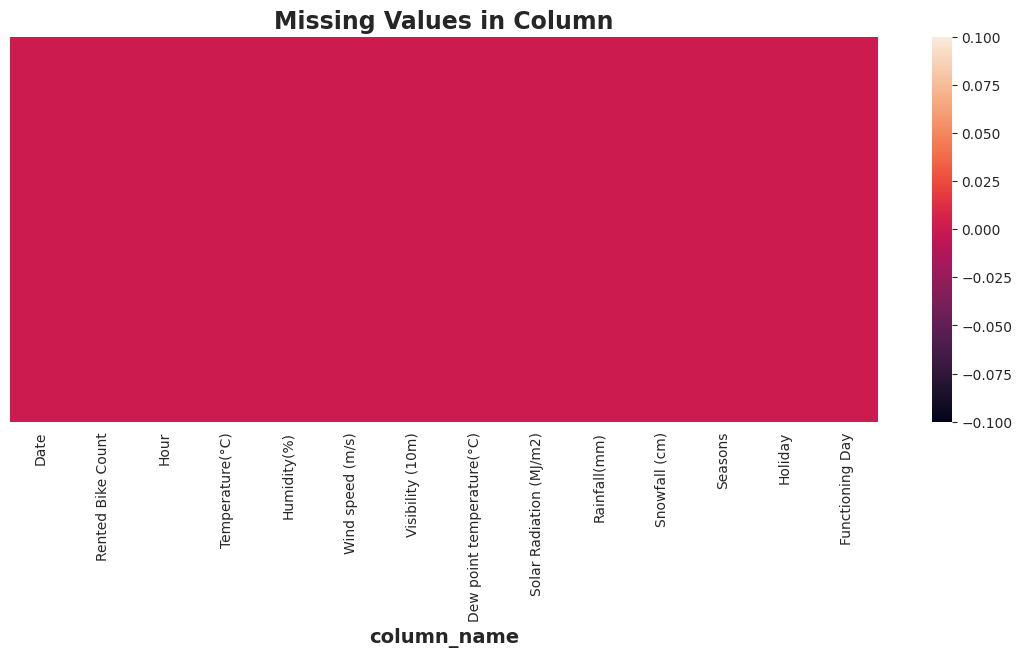

In [9]:
# Visualizing the missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=17)
plt.show()

In [10]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


In [11]:
# Describe the dataset 
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [12]:
# fetch basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **2. Understanding your variables**

In [13]:
# fetch attribute
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Attribute Description


* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

In [14]:
#checking unique values
df.nunique().reset_index().rename(columns={'index':'Columns',0:'Unique values'})

Columns  Unique values
0                        Date            365
1           Rented Bike Count           2166
2                        Hour             24
3             Temperature(°C)            546
4                 Humidity(%)             90
5            Wind speed (m/s)             65
6            Visibility (10m)           1789
7   Dew point temperature(°C)            556
8     Solar Radiation (MJ/m2)            345
9                Rainfall(mm)             61
10              Snowfall (cm)             51
11                    Seasons              4
12                    Holiday              2
13            Functioning Day              2

### What did you know about your dataset?

* >The dataset is from a rental bike company based out of Seoul. The goal of this project is to develop a machine learning model that can predict the demand for rental bikes.
* >There are not any null and duplicate value in the dataset.
* >Dataset has 8760 entries with 14 features.
* >The dataset contains the hourly weather conditions for a period of 364 days, and other details such as whether a said day was a holiday or not.

## 3. ***Data Wrangling***

* Data wrangling, also known as data cleaning or data preprocessing, is the process of transforming and cleaning raw data into a structured and usable format. It involves various tasks such as removing irrelevant or duplicate data, and converting data into a standardized format. The goal of data wrangling is to make the data more suitable for analysis, which involves making it accurate, complete, and consistent. 

### Renaming the columns name :
* To improve the readability of a dataset and enhance understanding is to rename the column names. 


In [15]:
# renaming the features

df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

### Converting the date column in appropriate format

In [16]:
# finding the datatype of 'Date' column

type(df['date'][0])

str

In [17]:
# converting string format of 'Date' column into date-time format

df['date'] = pd.to_datetime(df['date'])

In [18]:
df.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  
0  No Holiday      Yes  
1  No Holiday      Yes  
2  No Holiday      Yes  
3  No Holiday      Yes  
4  No Holiday      Yes

**Convert the "Date" column into 3 different column i.e "Year","Month" and "Day"** :
* "Year" column contains the 2 unique numbers, details from 2017 december to 2018 november.So if i consider this a year then we don't need this column, so we can drop it.
* "Day" column contains the details about the each day of the month, considering day wise data is too long, so we concise this data into a day is a weekday or a weekend. Therfore, convert it into this format and drop the "day" column.

In [19]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

#Converted weekdays and weekend into binary class as Weekdays = 0 and Weekend = 1.
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : "1" if x=='Saturday' or x=='Sunday' else "0" )


In [20]:
# Remove date, day_of_week column from data set
df=df.drop(columns=['date','day_of_week'],axis=1)

In [21]:
df.head(5)

rented_bike_count  hour  temperature  humidity  wind_speed  visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   dew_point_temp  solar_radiation  rainfall  snowfall seasons     holiday  \
0           -17.6              0.0       0.0       0.0  Winter  No Holiday   
1           -17.6              0.0       0.0       0.0  Winter  No Holiday   
2           -17.7              0.0       0.0       0.0  Winter  No Holiday   
3           -17.6              0.0       0.0       0.0  Winter  No Holiday   
4           -18.6              0.0       0.0       0.0  Winter  No Holiday   

  func_day  month weekdays_weekend  
0      Yes      1                0  
1      Yes      1                0  
2      Yes      1                0  
3      Yes      1                0  
4      Yes      1                0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekdays_weekend   8760 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 1.0+ MB


#### Look at the data, Hour and month Columns are a numerical columns but these are time stamp so we have to treat Hour and month columns as a categorical feature

In [23]:
# convert Hour column integer to Categorical 
df['hour']=df['hour'].astype('object')

# convert month column integer to Categorical 
df['month']=df['month'].astype('object')


**Let's Separate the data :**
* Before proceeding with the distribution check ,let's first split the data into 2 lists (i.e. numericals and categoricals) for better understanding.

**What is Categorical data?**
* A categorical variable is a variable that represents a set of categories or groups. Categorical variables can take on a limited number of possible values, such as yes or no, red, blue or green. Categorical variables are often used to represent **qualitative data** and are non-numeric in nature. It includes data type such as object and other category.

**What is Numerical data?**
* A numerical variable is a variable that represents numerical values. Numerical variables can take on any numeric value and can be either discrete or continuous. Examples of numerical variables include age, weight, height, temperature, and income. Numerical variables are often used to represent **quantitative data** and can be used in mathematical calculations.

#### Extract categoricals and Numerical columns

In [24]:
# Divide Data in categorical and numerical features
num_col= df.select_dtypes(exclude='object')
cat_col=df.select_dtypes(include='object')

In [25]:
# fetch unique value in categorical feature columns

for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

hour has [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] values


seasons has ['Winter' 'Spring' 'Summer' 'Autumn'] values


holiday has ['No Holiday' 'Holiday'] values


func_day has ['Yes' 'No'] values


month has [1 2 3 4 5 6 7 8 9 10 11 12] values


weekdays_weekend has ['0' '1'] values




## Visualize categorical columns

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6), dpi=200)

# Iterate through each categorical column and create a pie chart
for i, feature in enumerate(cat_col):
  
  # Create a subplot for each pie chart
  plt.subplot(2,3, i+1)
  
  # Generate the value counts of the current column
  value_counts = df[feature].value_counts()
  
  # Generate the pie chart with the value counts of the current column
  plt.pie(value_counts, labels=value_counts.index, autopct='%.0f%%')
  
  # Set the title of the subplot to the name of the current column
  plt.title(feature, fontsize=12, color='red')
  
  # Adjust the layout of the subplots for better spacing
  plt.tight_layout()

# Show the pie charts
plt.show()


**1. Why did you pick the specific chart?**

A pie chart is a useful tool to display the distribution of various categories in a dataset. By dividing the circle into proportional sections, each representing a different category, the pie chart allows for a clear comparison of the relative size of each category. The use of different colors for each section further enhances the clarity of the representation and makes it easier to understand and interpret the data.

**2. What is/are the insight(s) found from the chart?**

* The data shows that a hours and seasons are equally distributed.
* Mostlty bike rented on function_day and non_holidays.


**3. Will the gained insights help creating a positive business impact?** 


* Yes, gaining insights into the distribution of bike rentals across different times of day and seasons, as well as the preference for functional days over non-holidays, can help bike rental businesses create a positive impact on their operations and customer experience. With this knowledge, bike rental businesses can adjust their resources and marketing strategies to match the demand, ensuring they have enough bikes available when customers need them most.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Why do we perform EDA?**
* Exploratory Data Analysis (EDA) is a process of examining data to uncover patterns, relationships, anomalies, and other insights. It involves visualizing and summarizing data, identifying missing data and outliers, and exploring relationships between variables. EDA is a crucial step in the data analysis process and helps to guide further analysis and model selection.

## *Chart* - 1: Analyzing the distribution of the dependent variable


In [27]:
# defining dependent variable separately
dependent_variable = ['rented_bike_count']

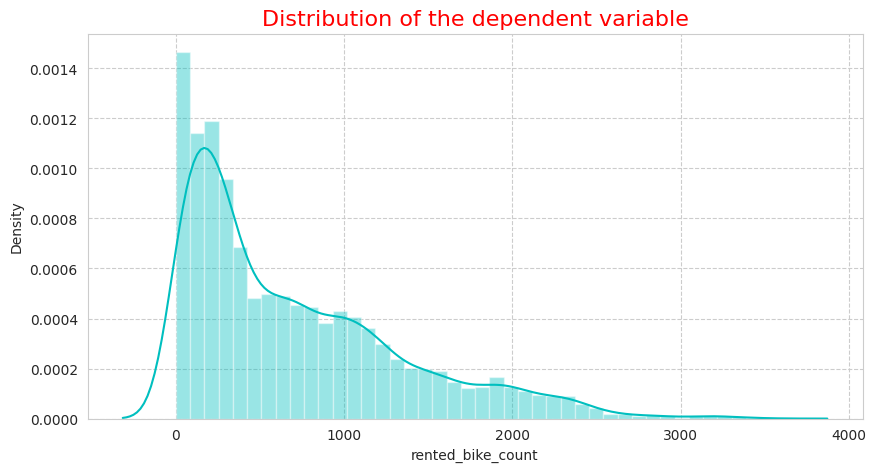

In [28]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df['rented_bike_count'],color="c") 
plt.title('Distribution of the dependent variable',fontsize=16,color='red');

In [29]:
#skew of the dependant varaible
df[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

*  Skewness is a measure of the asymmetry of a probability distribution and having value between 0.5 and 1.0 is considered moderately skewed, while a value greater than 1.0 is highly skewed.
* A skewness value of 1.153428 indicates a highly positive skew.
*  log transformations, square root transformations, or Box-Cox transformations are used to reduce the skewness and make it more normally distributed.  

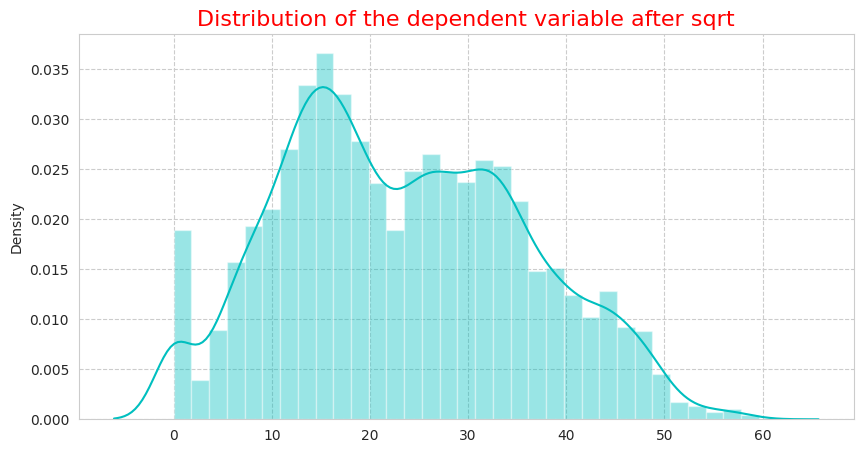

In [30]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]),color="c")
plt.title('Distribution of the dependent variable after sqrt',fontsize=16,color='red');

In [31]:
# skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

* A skewness value of 0.237362 indicates that the distribution is closer to a normal distribution.

**1. Why did you pick the specific chart?**

* A displot is a type of chart used to visualize the distribution of a single variable. It combines a histogram with a kernel density plot to provide an estimate of the probability density function of the variable. The histogram displays the frequency distribution of the variable, while the kernel density plot displays the continuous distribution curve of the variable.The displot is useful for checking normality, exploring the shape of the distribution, and identifying any issues that need to be addressed before data analysis.

**2. What is/are the insight(s) found from the chart?**

* The Rented Bike Count variable is highly skewed towards the right, which violates the normal distribution assumption of linear regression. To address this issue, we applied a data transformation technique to normalize the variable. Specifically, we used the square root transformation, which resulted in a nearly normal distribution for the Rented Bike Count variable.

**3. Will the gained insights help creating a positive business impact?** 
* Yes, gaining insights from data analysis can have a positive impact on a business. By analyzing data, businesses can gain a better understanding of customer behavior, market trends, and operational efficiency.


## *Chart - 2*: Explore relation between categorical feature and dependent variable

In [32]:
# fetch categorical columns
cat_col

hour seasons     holiday func_day month weekdays_weekend
0       0  Winter  No Holiday      Yes     1                0
1       1  Winter  No Holiday      Yes     1                0
2       2  Winter  No Holiday      Yes     1                0
3       3  Winter  No Holiday      Yes     1                0
4       4  Winter  No Holiday      Yes     1                0
...   ...     ...         ...      ...   ...              ...
8755   19  Autumn  No Holiday      Yes    11                0
8756   20  Autumn  No Holiday      Yes    11                0
8757   21  Autumn  No Holiday      Yes    11                0
8758   22  Autumn  No Holiday      Yes    11                0
8759   23  Autumn  No Holiday      Yes    11                0

[8760 rows x 6 columns]

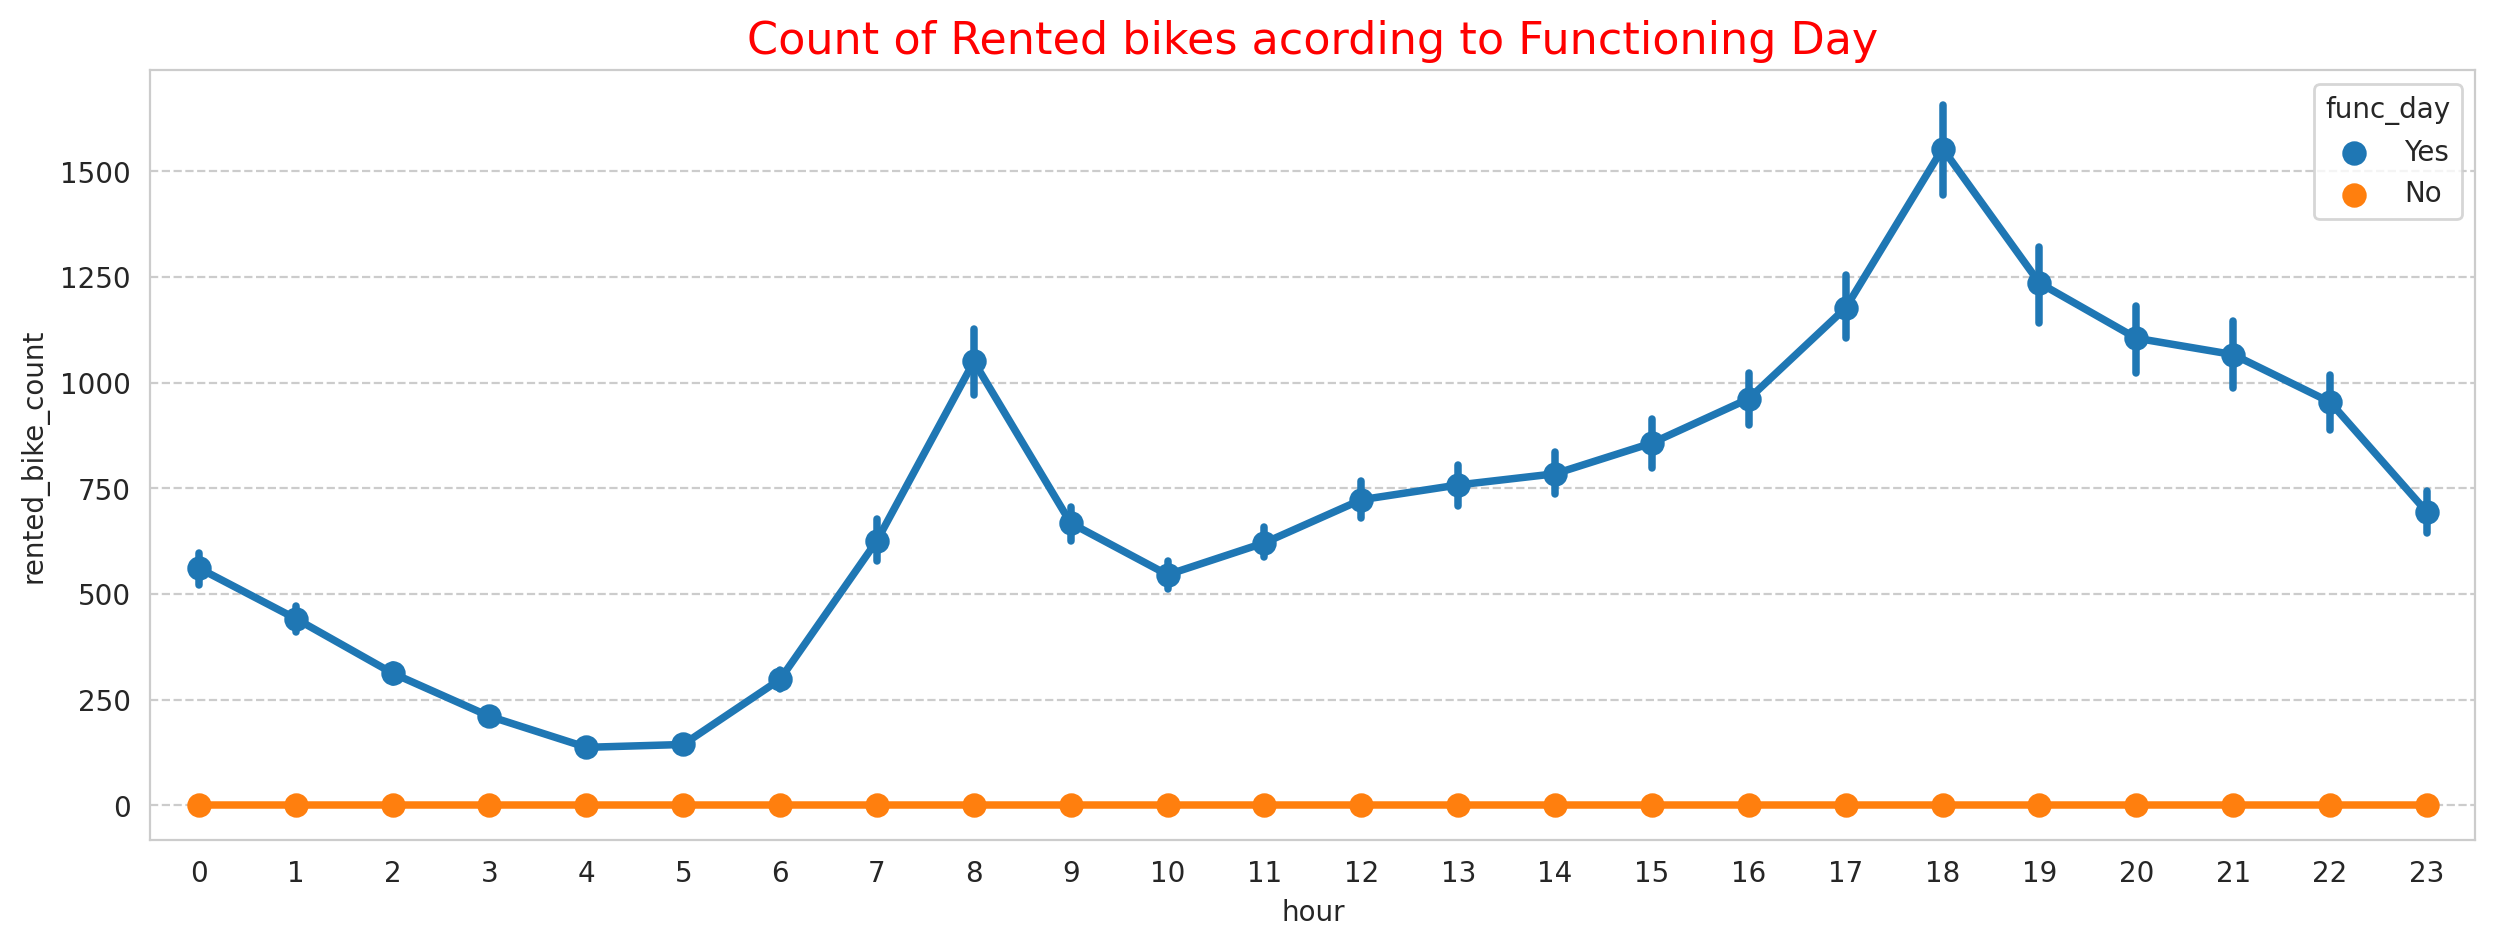

In [33]:
# Functioning_day v/s Bike_count graph :

plt.figure(figsize=(15,5),dpi=200)
sns.pointplot(data=df,x='hour',y='rented_bike_count',hue='func_day')
plt.title('Count of Rented bikes acording to Functioning Day', fontsize=16,color='red');

Text(0.5, 1.0, 'Count of Rented bikes acording to seasons')

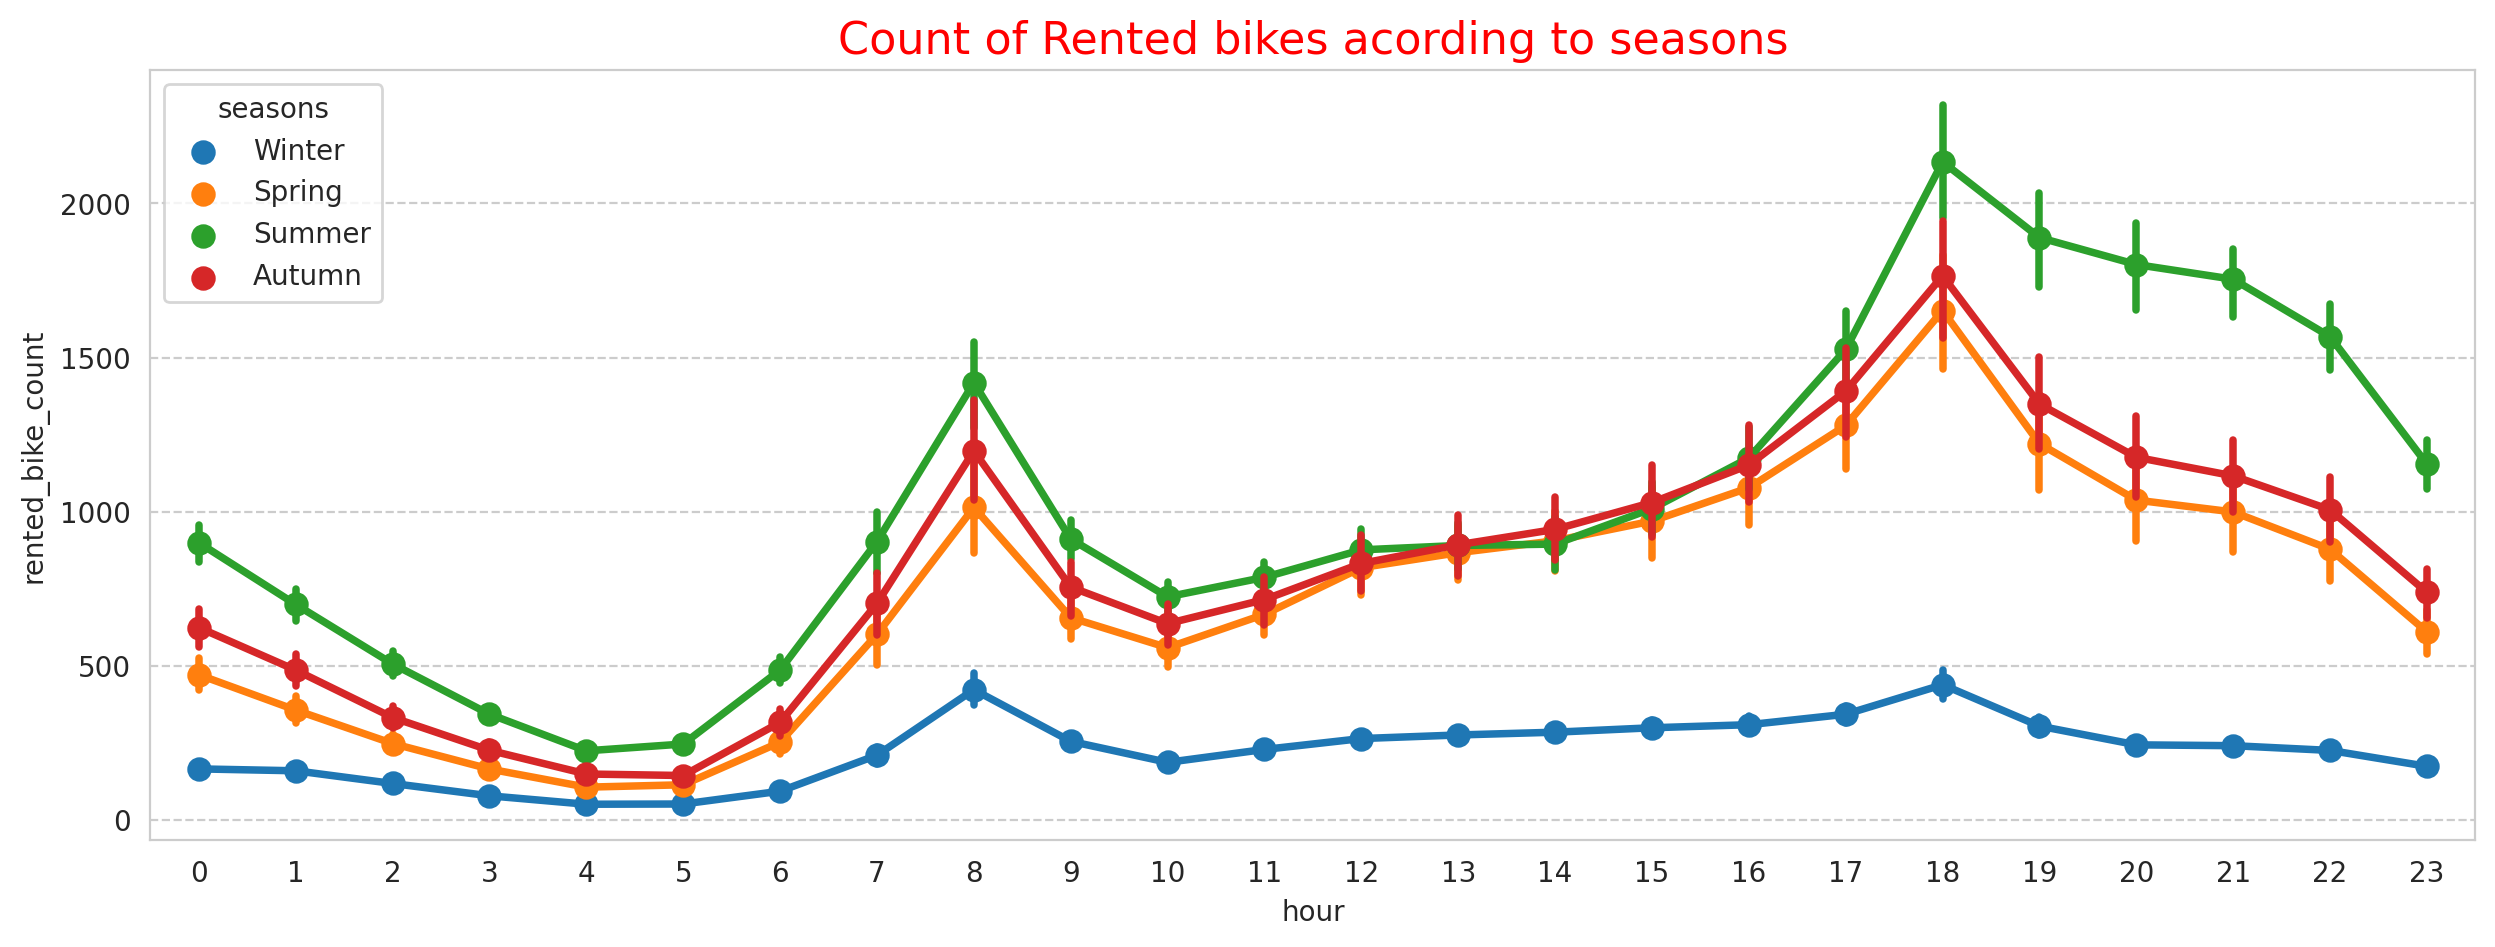

In [34]:
# Season v/s Hour v/s the bike counts :
plt.figure(figsize=(15,5),dpi=200)
sns.pointplot(data=df,x='hour',y='rented_bike_count',hue='seasons')
plt.title('Count of Rented bikes acording to seasons',fontsize=16,color='red')

In [35]:
# Holiday v/s bike counts v/s Hour :
plt.figure(figsize=(15,5),dpi=200)
sns.pointplot(data=df,x='hour',y='rented_bike_count',hue='holiday')
plt.title('Count of Rented bikes acording to Holiday',fontsize=16,color='red');

**1. Why did you pick the specific chart?**

A point plot is a type of data visualization in which data points are represented as discrete points along an axis. our aim to display the relationship between numerical variable(rented_bike_count) and categorical variables(holiday,seasons, and functioning day). 

**2. What is/are the insight(s) found from the chart?**

* The graph indicates that no bikes were rented on non-working days, and bikes were only rented on working days.
* Regardless of the season, the peak hours for rented bikes are consistently at 8 am and 6 pm throughout the year.
* The number of rented bikes is highest during the summer season and lowest during the winter season, possibly due to snowfall.
* People tend to use rented bikes on holidays, with the highest usage occurring between 1pm to 8 pm.

**3. Will the gained insights help creating a positive business impact?** 


* Understanding the patterns of bike rentals can be a valuable asset for businesses looking to enhance their operations and customer satisfaction. By analyzing data, businesses can gain insights into the demand for bikes during different seasons, peak hours, and holidays, allowing them to optimize inventory, plan promotions, and improve their services accordingly. By leveraging these insights, businesses can make informed decisions that drive positive business impact and improve the overall customer experience.

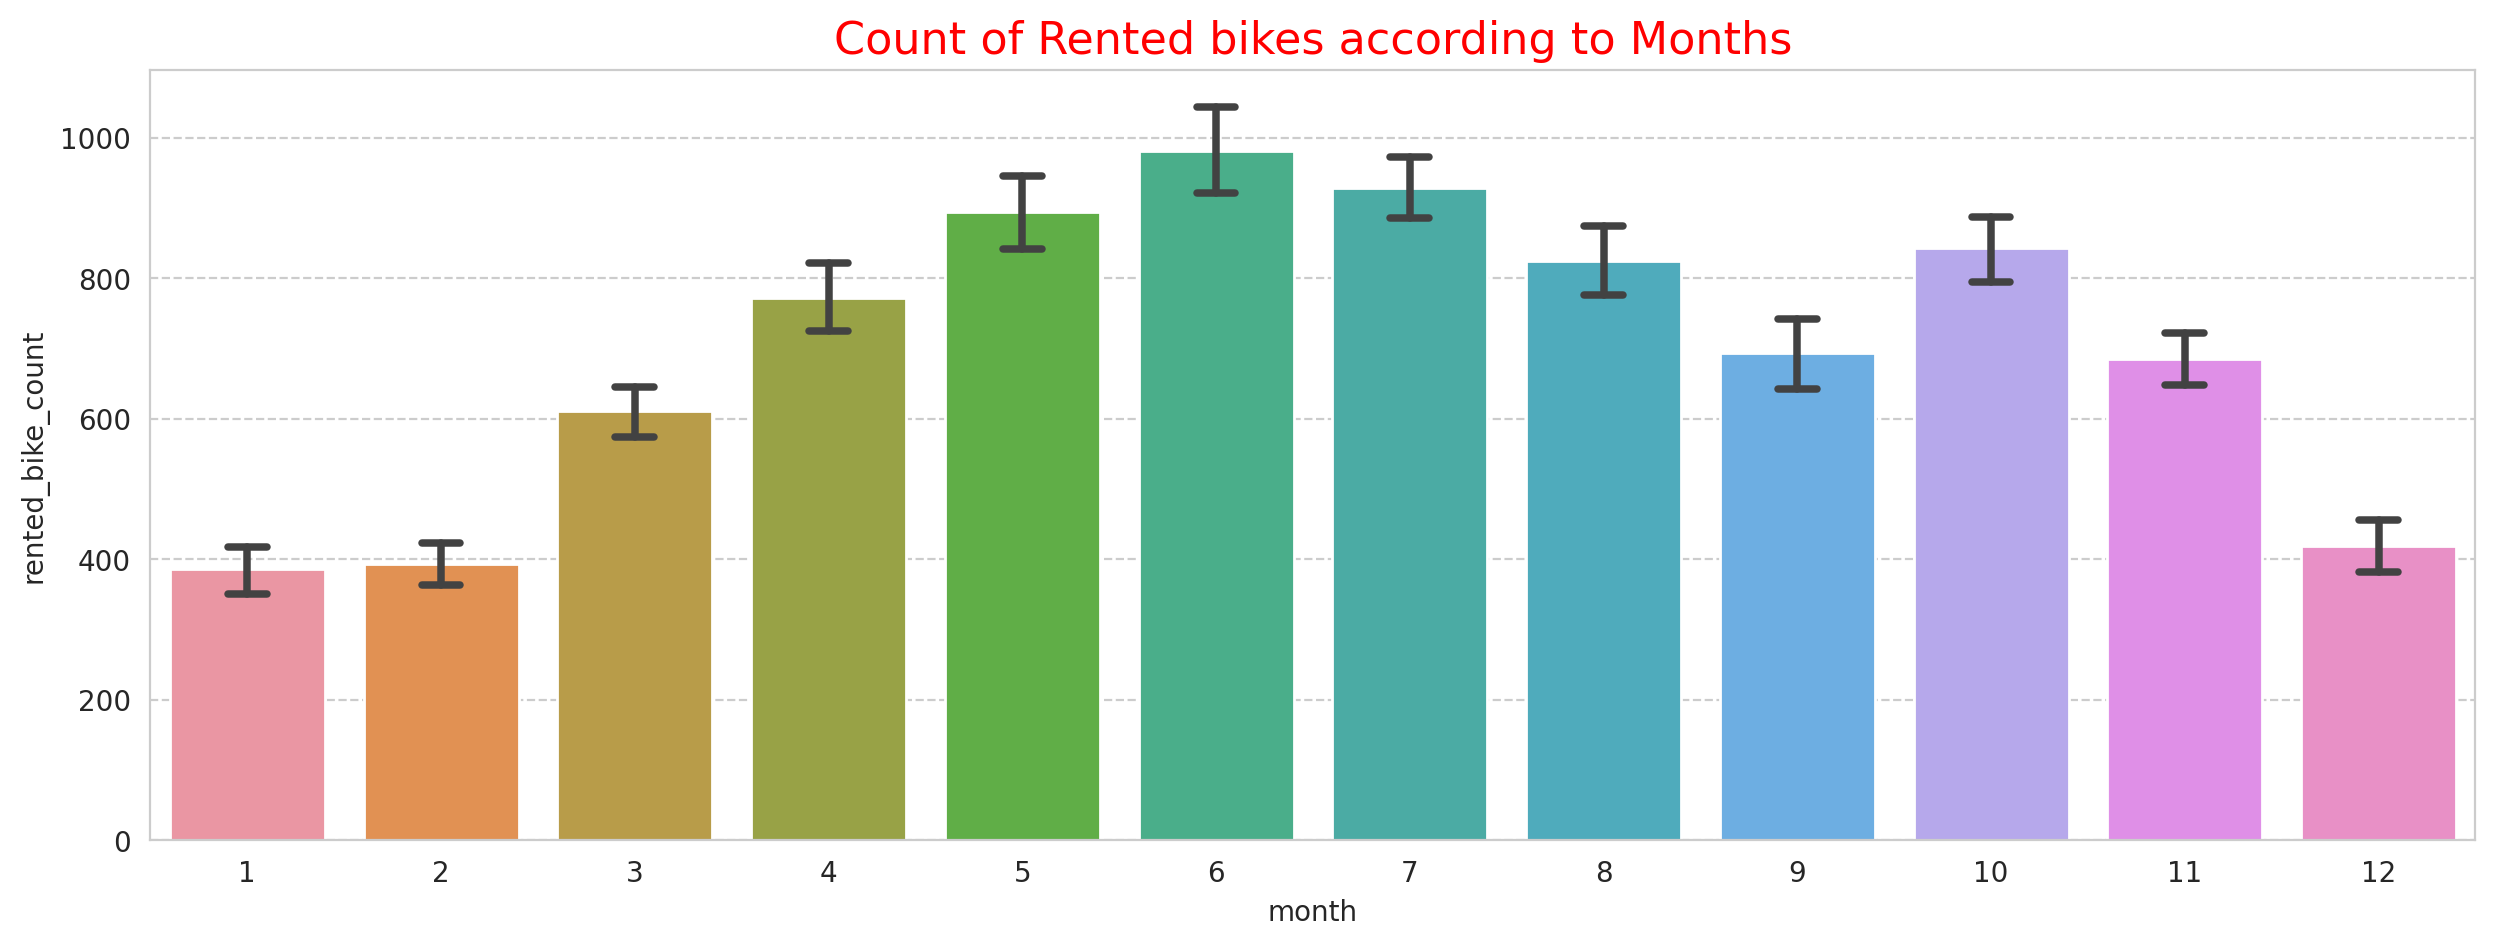

In [36]:
# Month v/s Rented_Bike_count graph :
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df,x='month',y='rented_bike_count',capsize=.2)
plt.title('Count of Rented bikes according to Months',fontsize=16,color='red');

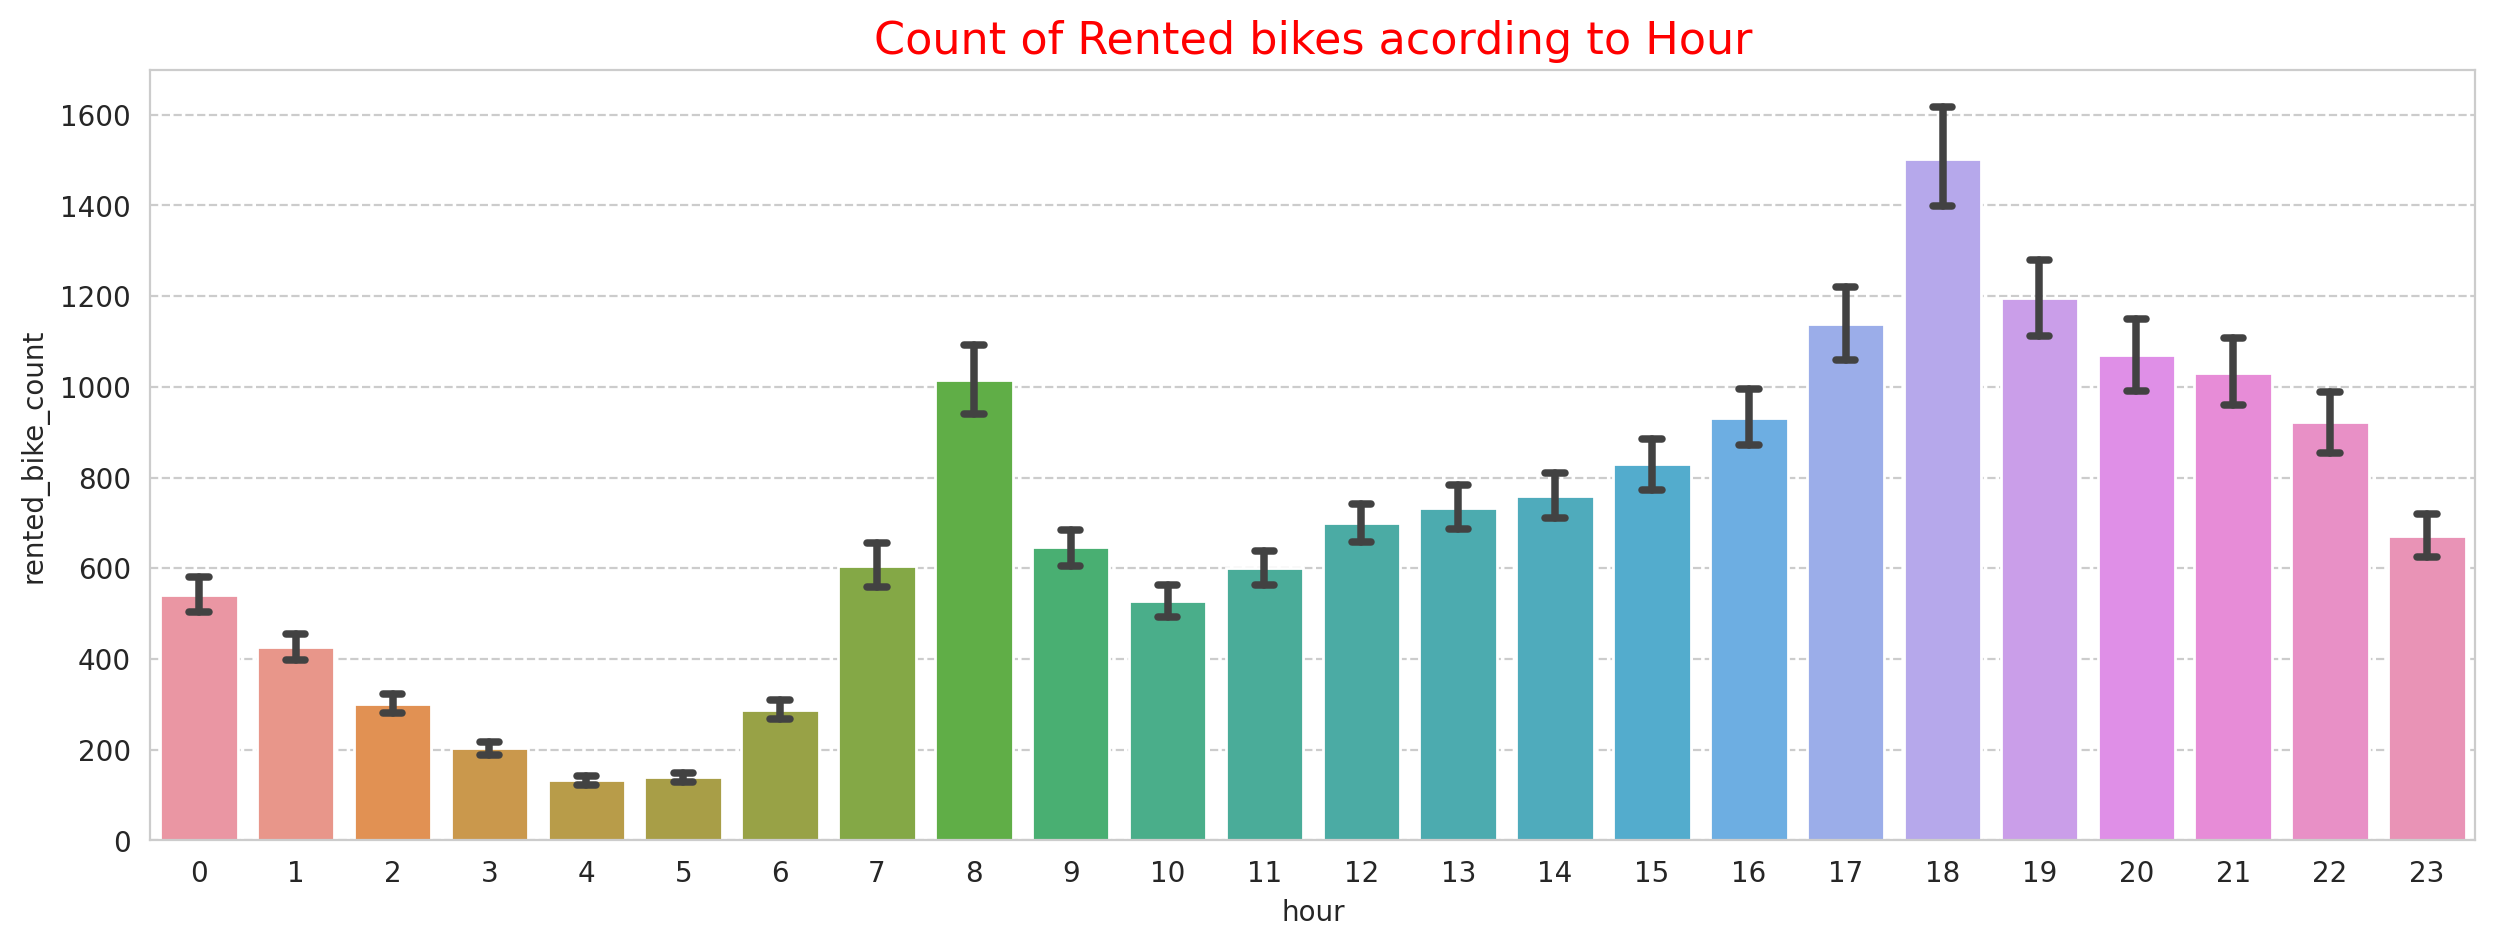

In [37]:
# Hour v/s Rented_Bike_count graph :
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df,x='hour',y='rented_bike_count',capsize=.2)
plt.title('Count of Rented bikes acording to Hour',fontsize=16,color='red');

**1. Why did you pick the specific chart?**

* Bar plot is commonly used to display the relationship between a categorical variable and a numerical variable. In a bar plot, the categorical variable is plotted along the x-axis and the numerical variable is plotted along the y-axis. The height or length of each bar represents the magnitude of the numerical variable for each category of the categorical variable.

**2. What is/are the insight(s) found from the chart?**

* June has the highest count of rented bikes, followed by May and July.
* The count of rented bikes is least during the beginning and end of the year, specifically in January, February, and December.
* The peak timings for bike rentals are 8 am and 6 pm, with the highest number of rentals occurring between 5 pm and 9 pm.

**3. Will the gained insights help creating a positive business impact?** 


* The gained insights about the patterns of bike rentals can potentially create a positive business impact. By understanding the months and timings with the highest and lowest number of rentals, businesses can adjust their operations and marketing strategies accordingly. For instance, they can plan for higher inventory during peak months and timings, and offer promotions to incentivize rentals during low-demand periods. 

## *Chart - 3:* Explore relation between numerical feature and dependent variable

In [39]:
# fetch numerical columns
num_col

rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      dew_point_temp  solar_radiation  rainfall  snowfall  
0              -17.6              0.0       0.0       0.0  
1              -17.6              0.0       0.0       0.0  
2              -17.7              0.0       0.0       0.0  
3              -17.6              0.0       0.0       0.0  
4              -18.6              0.0       0.0       0.0  
...              ...              ...       ...       ...  
8755           -10.3              0.0       0.0       0.0  
8756            -9.9              0.0       0.0       0.0  
8757            -9.9              0.0       0.0       0.0  
8758            -9.8              0.0       0.0       0.0  
8759            -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

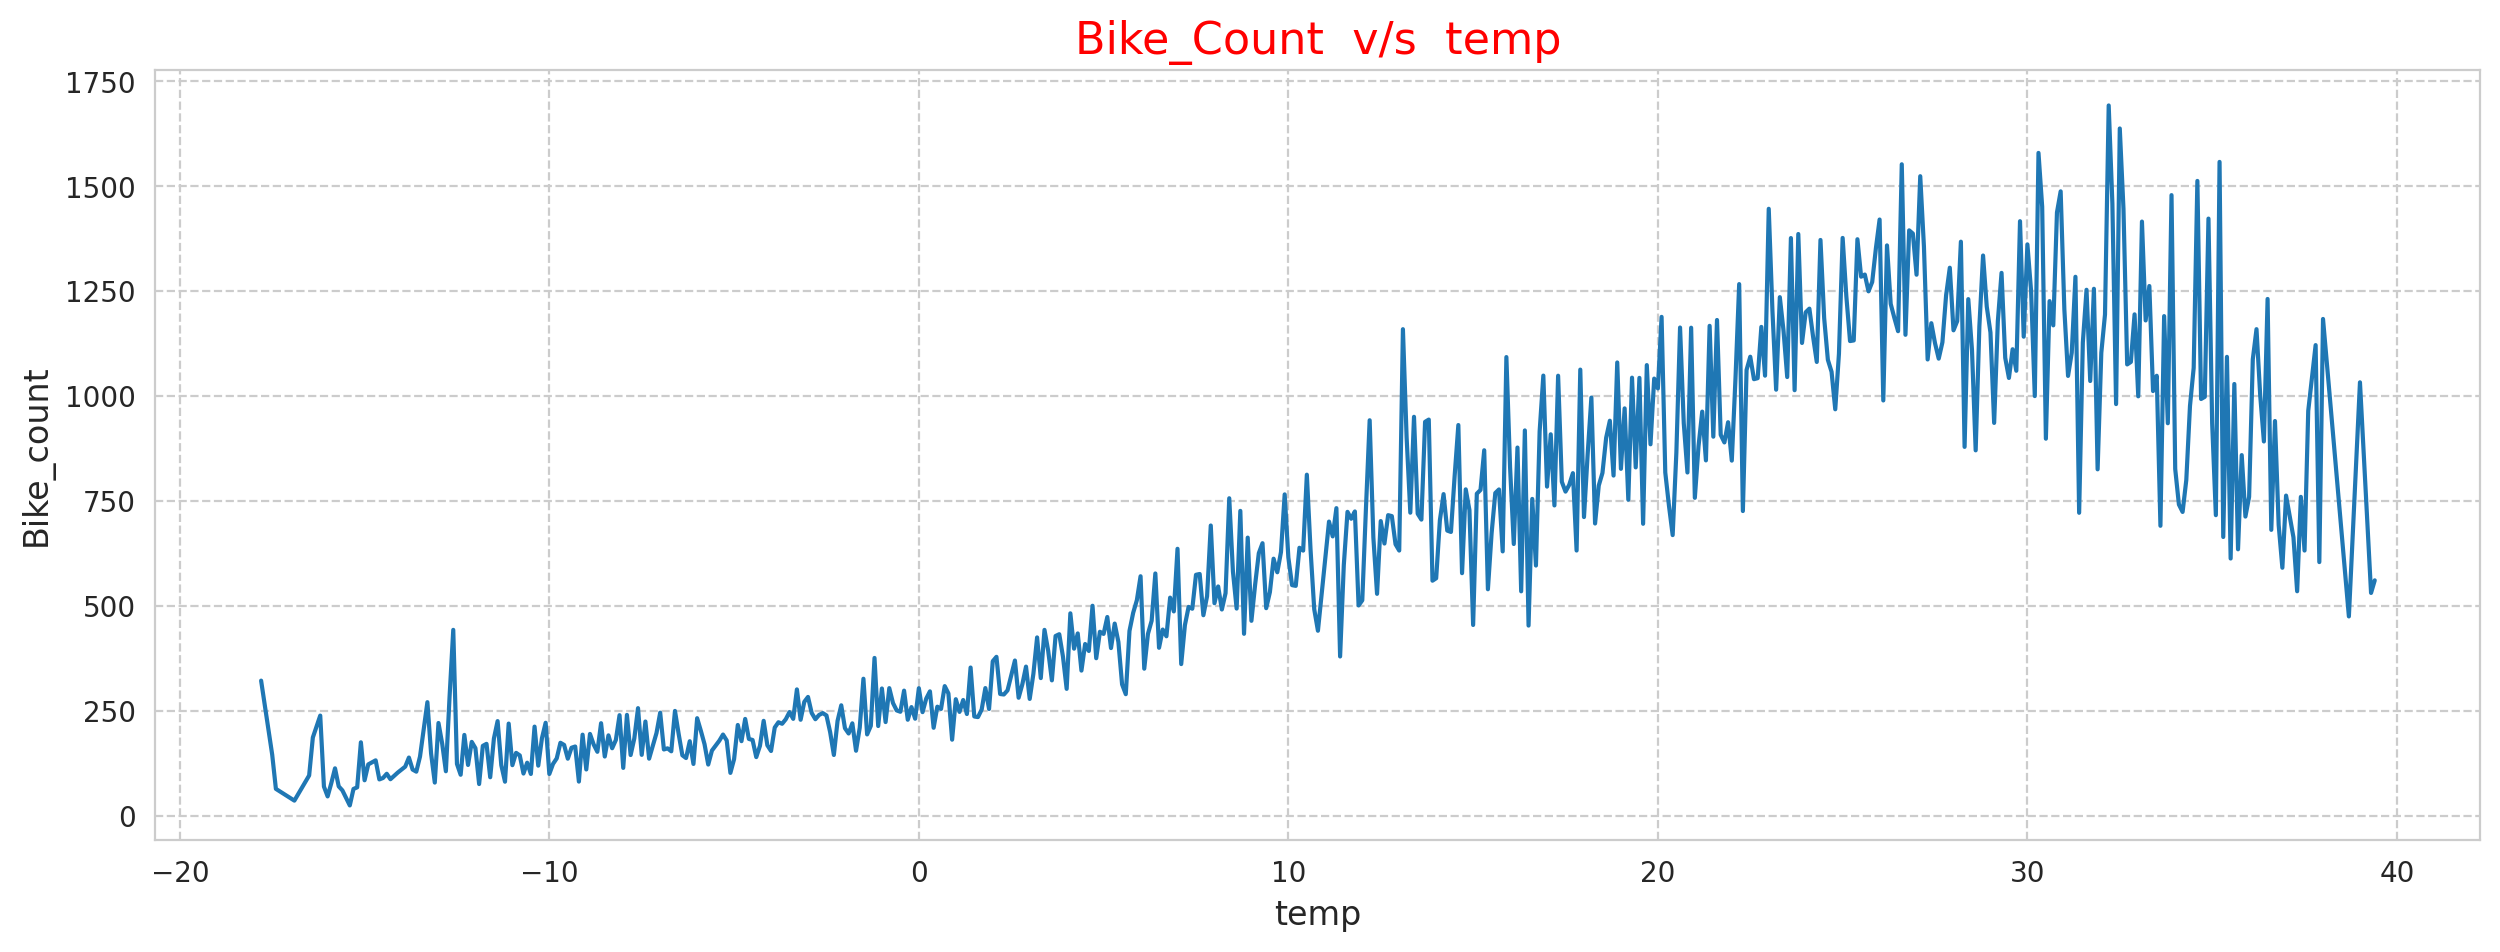

In [38]:
# Analyzing the relationship between "Bike_Count" and "Temperature" :
plt.figure(figsize=(15,5),dpi=200)
df.groupby('temperature').mean()['rented_bike_count'].plot()
plt.title("Bike_Count  v/s  temp",fontsize=16,color='red')
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('temp',fontsize=12);

In [40]:
# Analyzing the relationship between "Bike_Count" and "Snowfall" :
plt.figure(figsize=(15,5),dpi=200)
df.groupby('snowfall').mean()['rented_bike_count'].plot()
plt.title("Bike_Count  v/s  Snowfall",fontsize=16,color='red')
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Snow',fontsize=12);

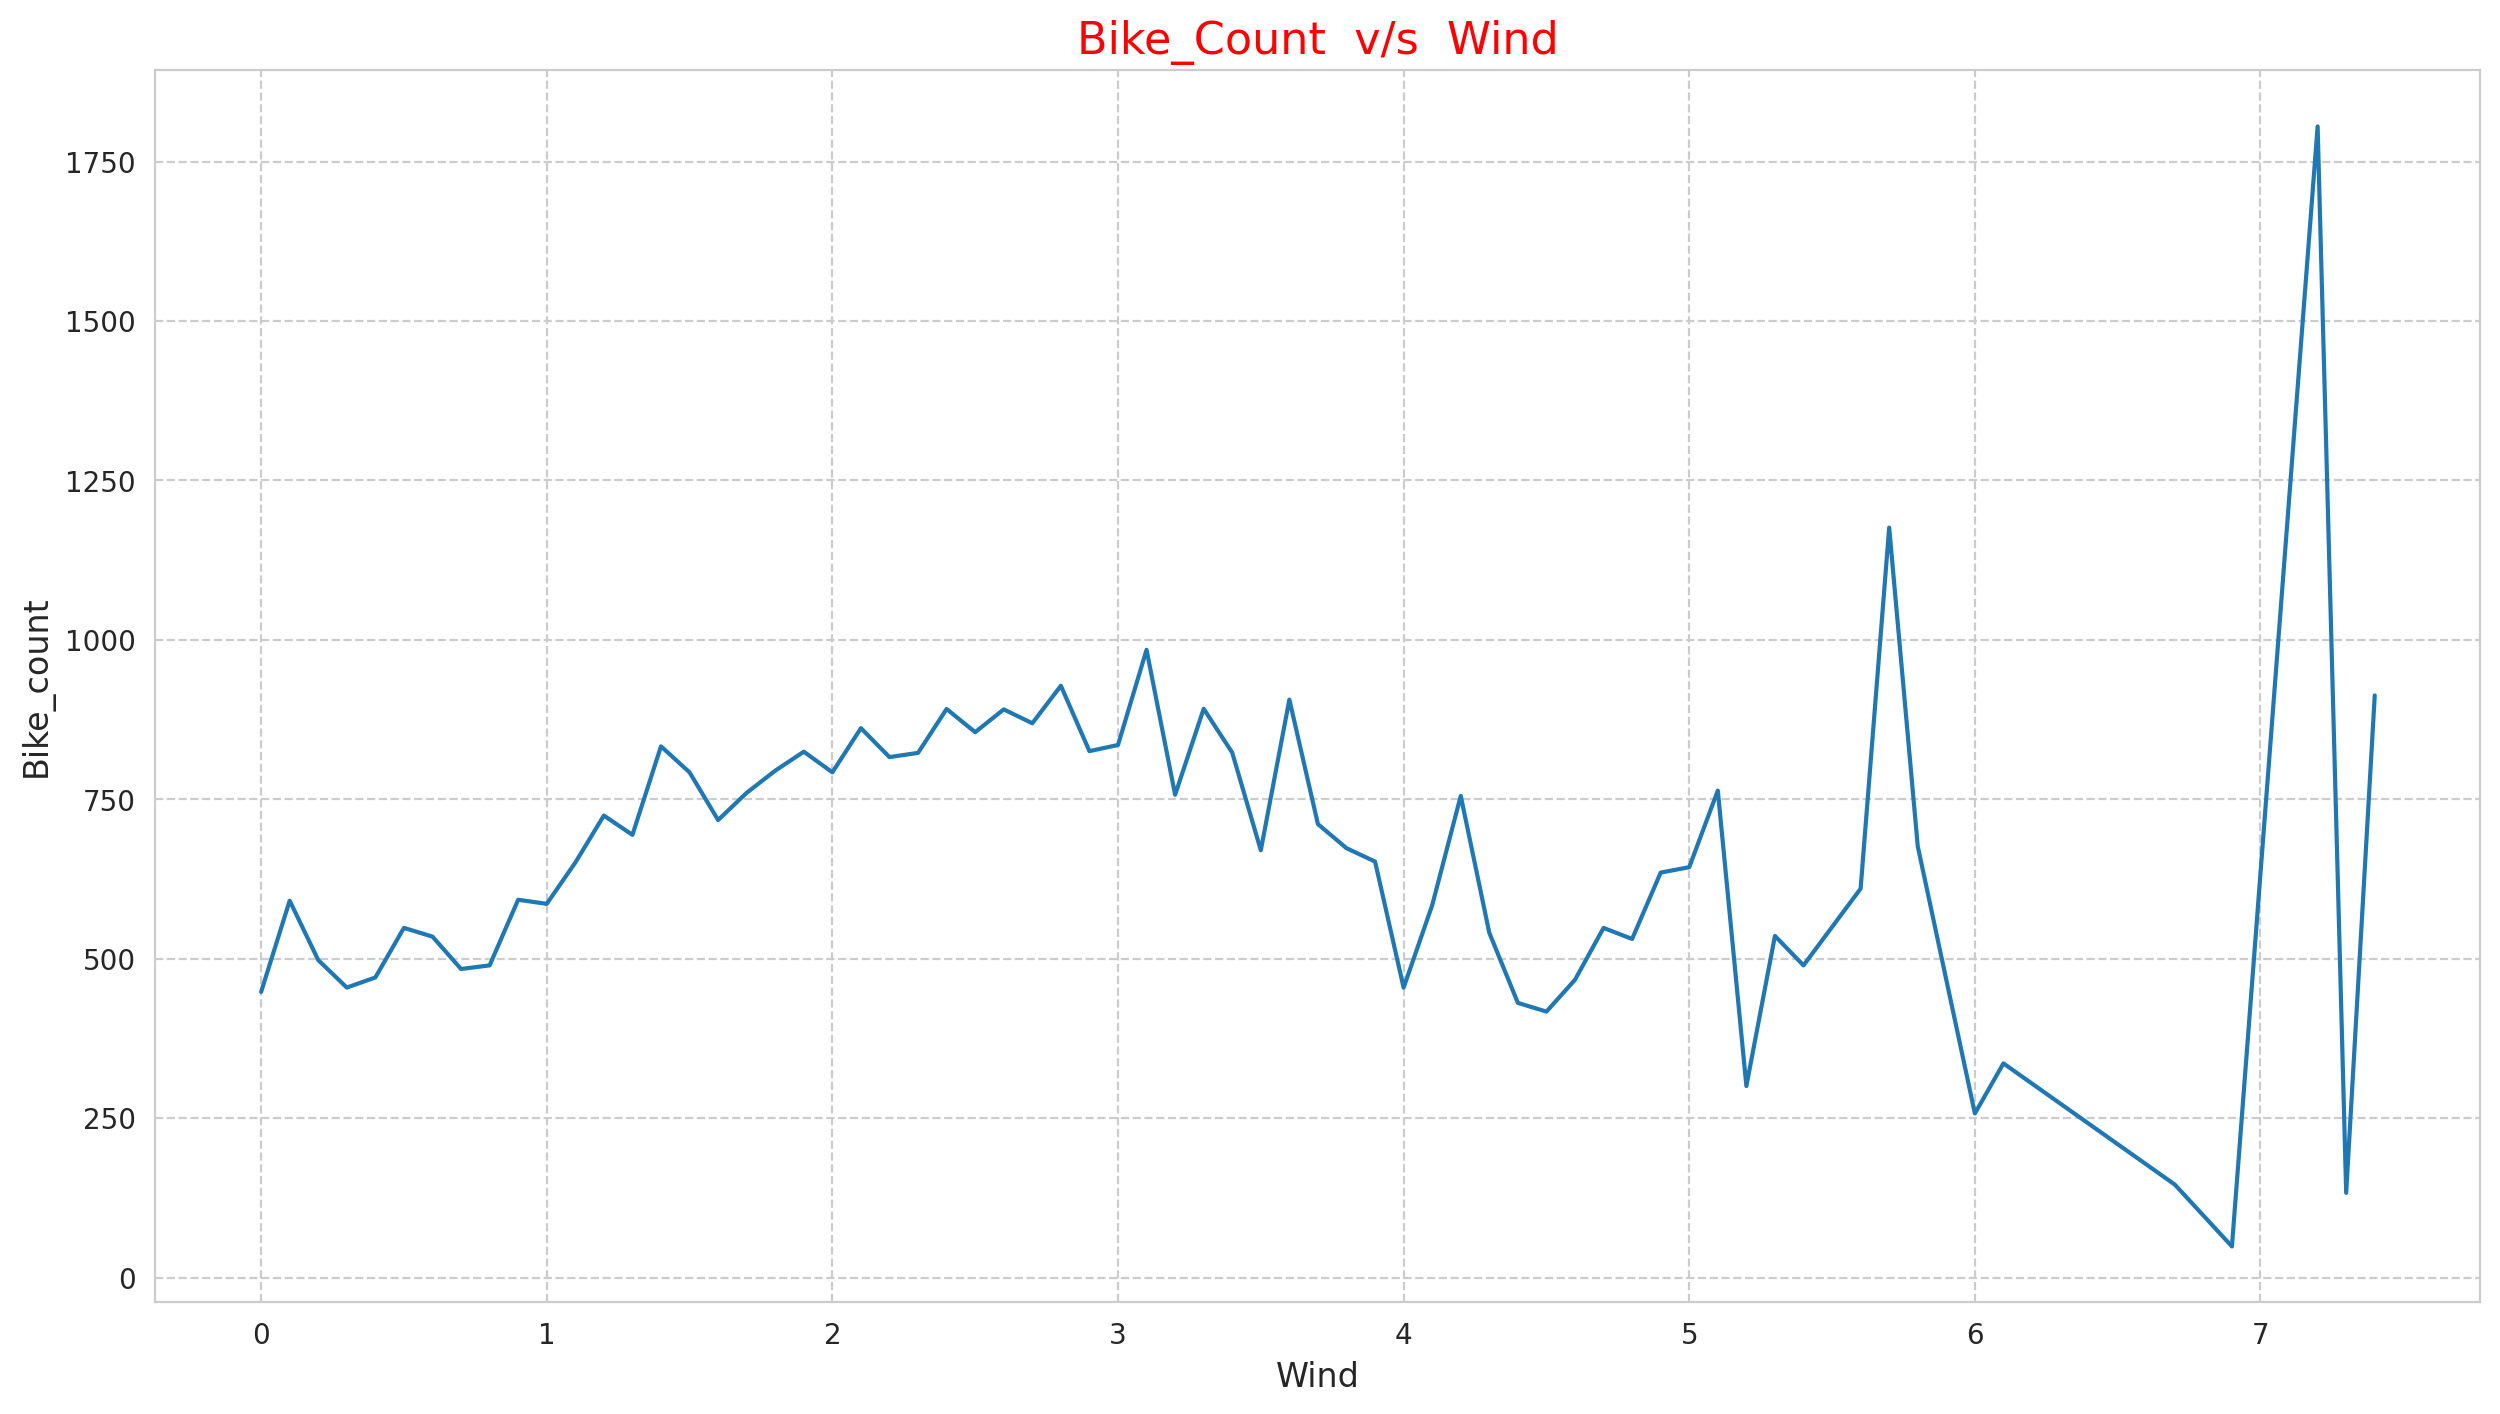

In [41]:
# Analyzing the relationship between "Bike_Count" and "Wind" :
plt.figure(figsize=(15,8),dpi=200)
df.groupby('wind_speed').mean()['rented_bike_count'].plot()
plt.title("Bike_Count  v/s  Wind",fontsize=16,color='red')
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Wind',fontsize=12);

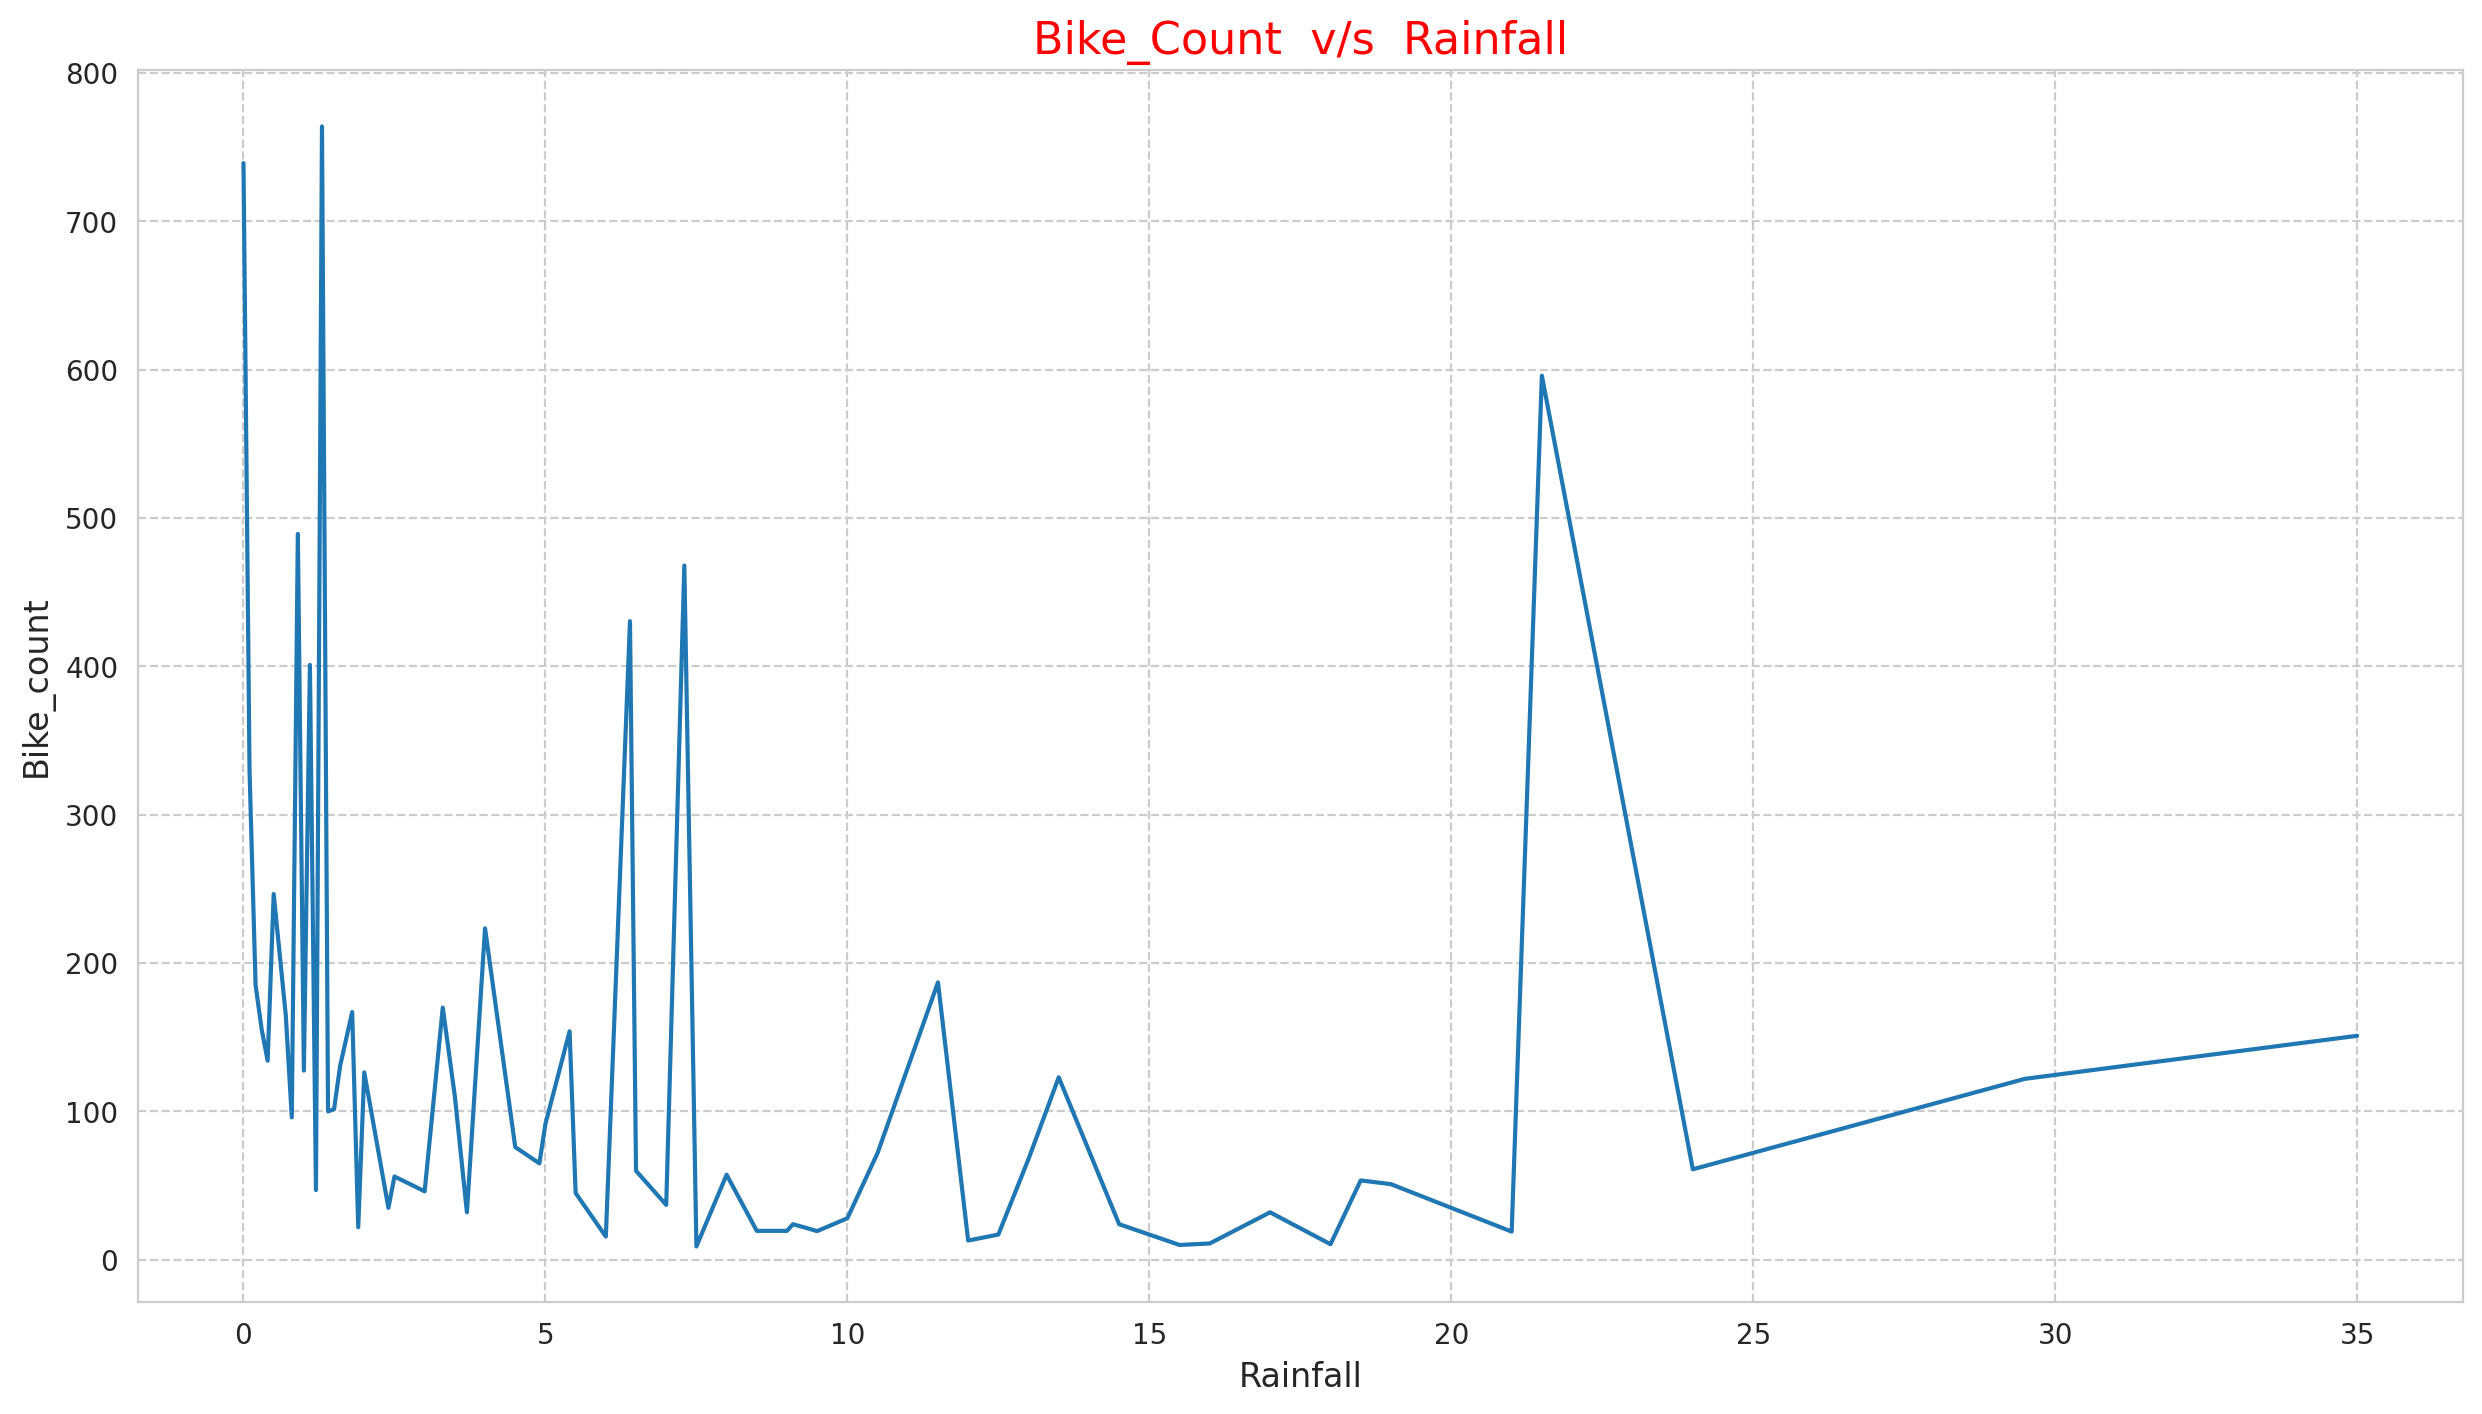

In [42]:
# Analyzing the relationship between "Bike_Count" and "Rainfall" :
plt.figure(figsize=(15,8),dpi=200)
df.groupby('rainfall').mean()['rented_bike_count'].plot()
plt.title("Bike_Count  v/s  Rainfall",fontsize=16,color='red')
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Rainfall',fontsize=12);

**1. Why did you pick the specific chart?**

* A line plot is a type of plot that displays data as a series of points connected by straight lines. Line plots are commonly used to display the relationship between two numerical variables, where one variable is plotted on the x-axis and the other variable is plotted on the y-axis. Line plots are useful for showing trends or patterns in data over time, and for identifying changes or discontinuities in the data.

**2. What is/are the insight(s) found from the chart?**

* The count of rented bikes is highest when the temperature is around 30°C, indicating that people prefer to ride bikes in warmer weather.
* While the count of rented bikes is generally lower in winter compared to other seasons, heavy snowfall (beyond 4cm) leads to a significant drop in bike rentals. Therefore, Snowfall appears to be a major factor influencing the count of rented bikes.
* Despite a slight drop in rented bikes during moderate rainfall (10-20 mm) the demand for rented bikes does not decrease significantly. In fact, there is a significant increase in rented bikes when there is heavy rainfall (20mm). Thus, it can be concluded that rainfall does not have a major impact on the count of rented bikes.

**3. Will the gained insights help creating a positive business impact?** 


* Yes, the gained insights from the analysis of the data can help create a positive business impact. For example, the insight that the count of rented bikes is highest when the temperature is around 30°C can be used to adjust the number of bikes available during the warmer months to meet the increased demand. Similarly, the insight that heavy snowfall leads to a significant drop in bike rentals can help the business plan accordingly for the winter months. By taking these insights into consideration, the business can optimize its operations and potentially increase revenue.

## *Chart - 4:* Plotting histogram with mean and median, and distplot of all the numeric features of the dataset



================================================== rented_bike_count ==================================================






================================================== temperature ==================================================




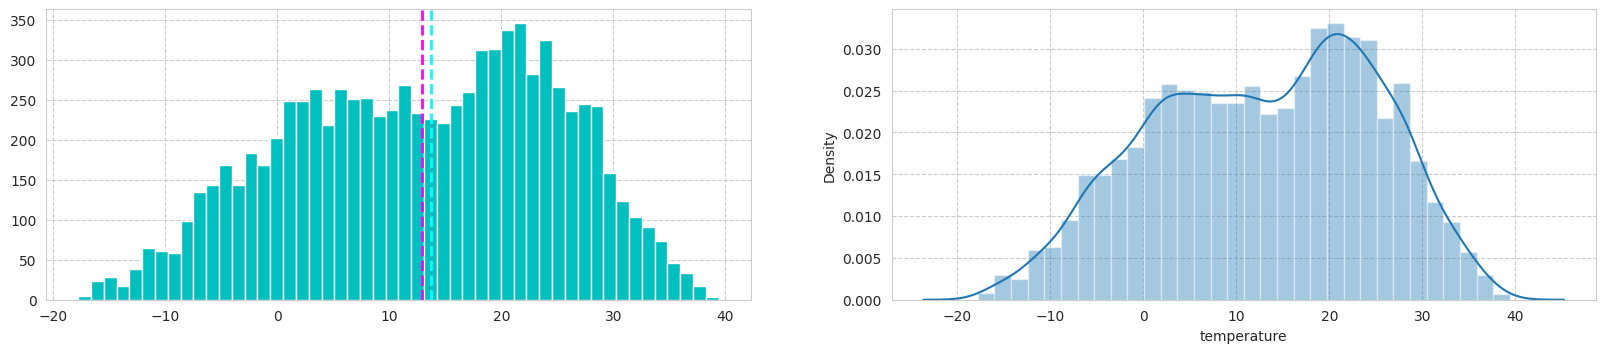



================================================== humidity ==================================================




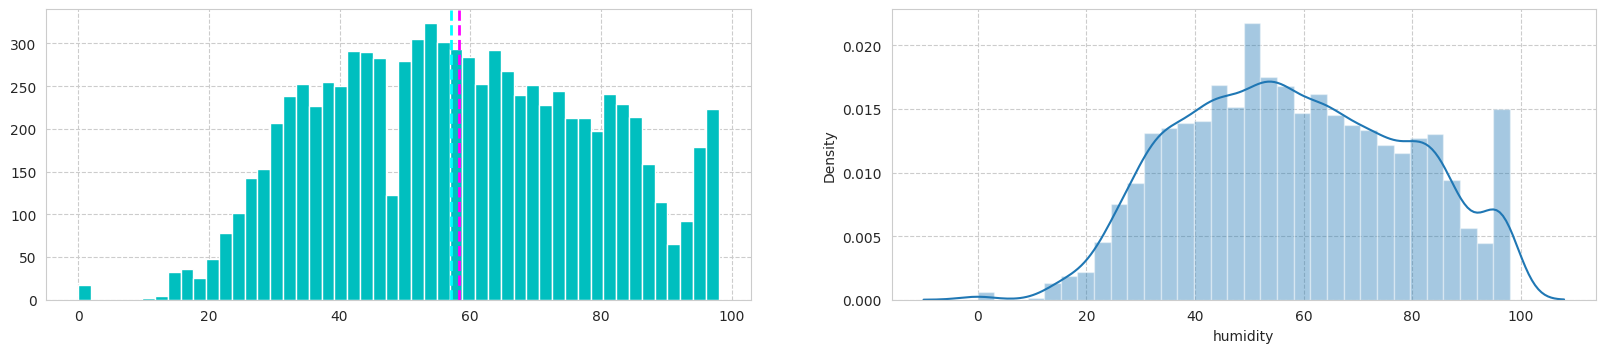



================================================== wind_speed ==================================================




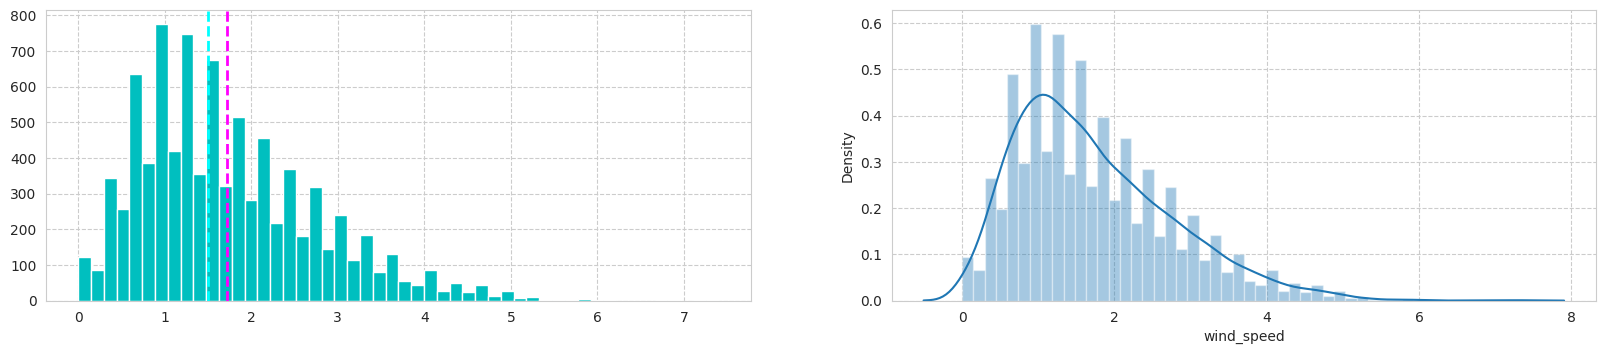



================================================== visibility ==================================================






================================================== dew_point_temp ==================================================






================================================== solar_radiation ==================================================






================================================== rainfall ==================================================




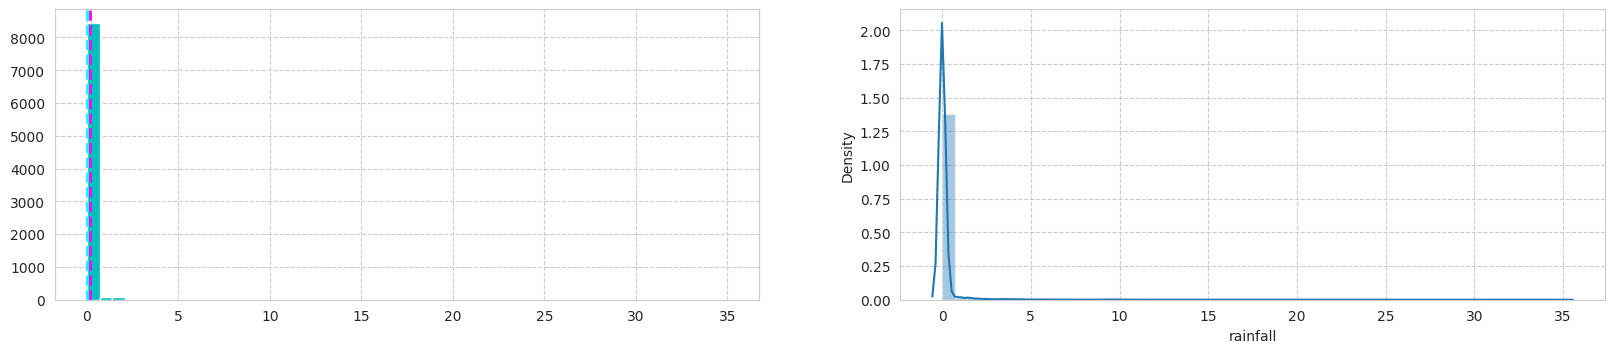



================================================== snowfall ==================================================




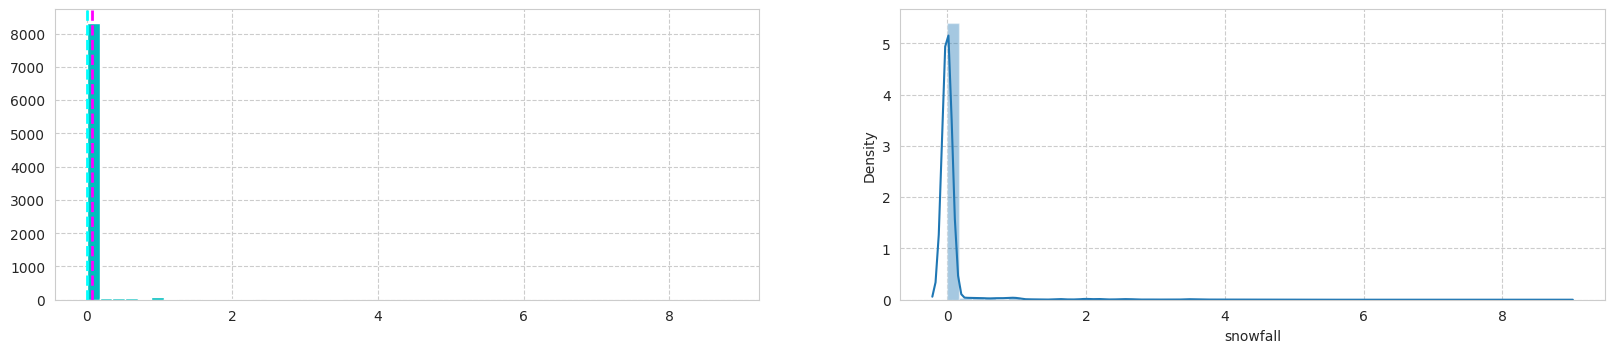

In [43]:
# Analyzing the distribution of the numeric independent variables

n=1
for i in num_col.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*50,i,'='*50)
  print('\n')
  
  feature=df[i]
  feature.hist(bins=50,color="c")
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  plt.show()

**1. Why did you pick the specific chart?**

* A displot is a type of chart used to visualize the distribution of a single variable. It combines a histogram with a kernel density plot to provide an estimate of the probability density function of the variable. The histogram displays the frequency distribution of the variable, while the kernel density plot displays the continuous distribution curve of the variable.The displot is useful for checking normality, exploring the shape of the distribution, and identifying any issues that need to be addressed before data analysis.

**2. What is/are the insight(s) found from the chart?**

* If Mean and median are close to each other, it suggests that the data is relatively symmetric, while a large difference between the mean and median indicates that the data may be skewed.

* **Normally distributed attributes:** temperature, humidity,Dew point temperature(°C).
* **Positively skewed attributes:** wind, solar_radiation, snowfall, rainfall.
* **Negatively skewed attributes:** visibility.

**3. Will the gained insights help creating a positive business impact?** 


## *Chart - 5:* Regression plot to know relation between dependent variable and numerical feature

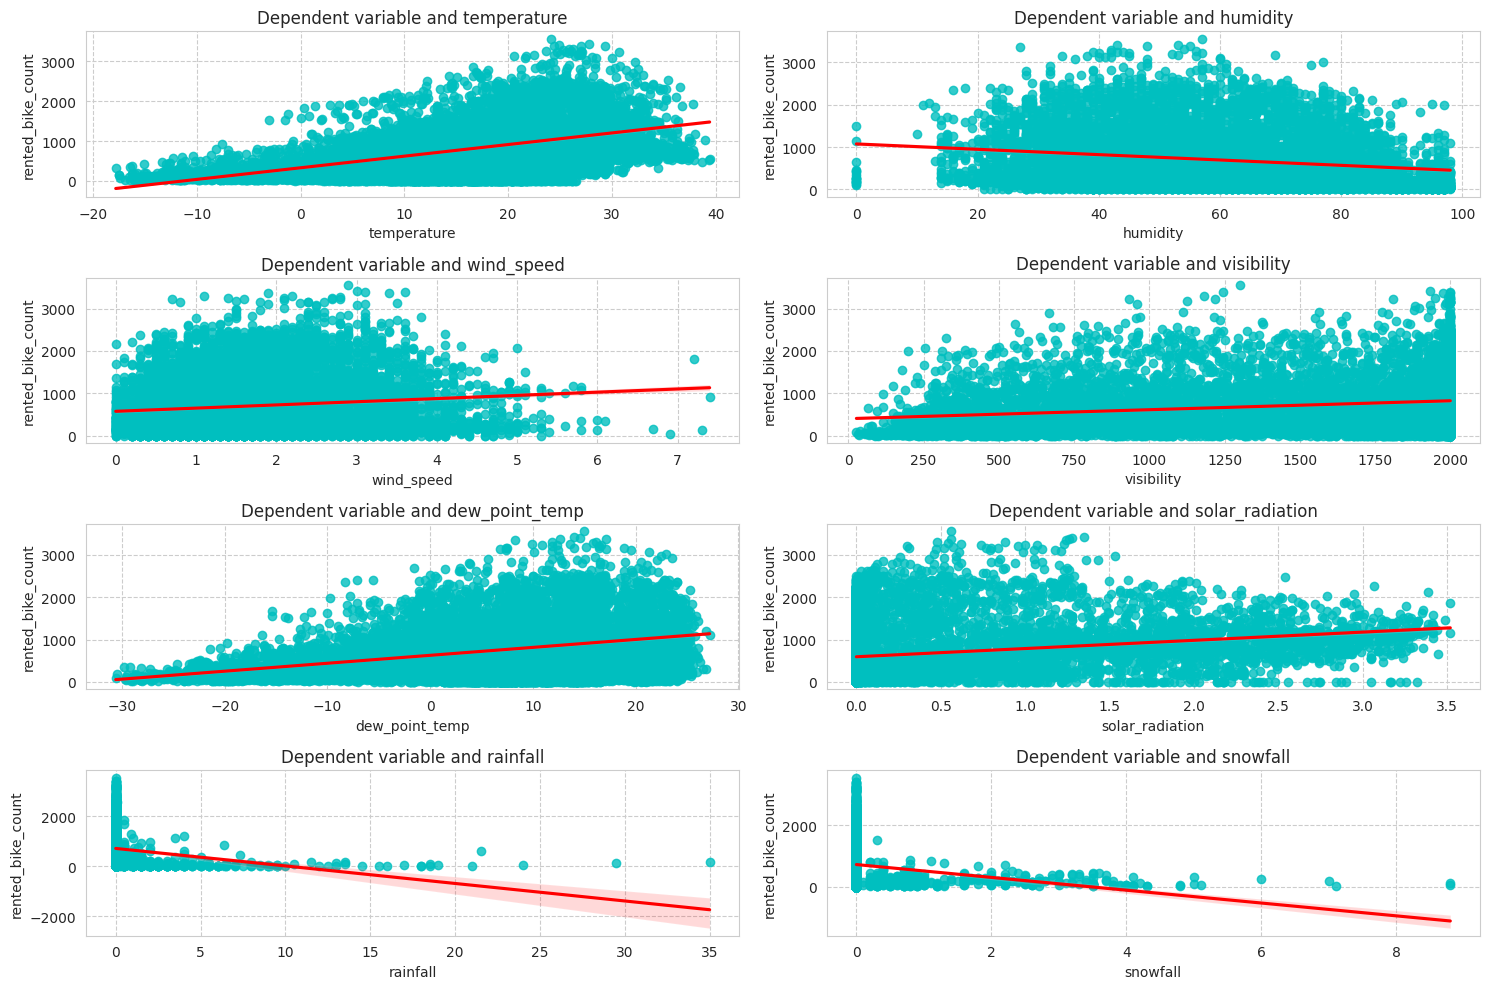

In [44]:
n=1
plt.figure(figsize=(15,10))
for i in num_col.columns:
  if i == 'rented_bike_count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=df[i], y=df['rented_bike_count'],scatter_kws={"color": "c"}, line_kws={"color": "red"})
    plt.title(f'Dependent variable and {i}')
    plt.tight_layout()

**1. Why did you pick the specific chart?**

* A regression plot is a type of data visualization that displays the relationship between two variables using a scatter plot with a regression line. It is commonly used to examine the relationship between a dependent variable and one or more independent variables, and can also be used to identify outliers, trends, and patterns in the data.

**2. What is/are the insight(s) found from the chart?**

* **Positive linear related features:** Hour, Temperature, Wind speed, visibility and solar radiation.
* **Negatively linear related features:** Rainfall, Snowfall, Humidity.

**3. Will the gained insights help creating a positive business impact?** 


* Yes, the insights gained from the linear regression analysis can be used to create a positive business impact. By identifying the factors that are positively correlated with the count of rented bikes, the business can allocate its resources accordingly, such as increasing the number of bikes available during peak hours and optimizing the rental prices. On the other hand, the insights gained from the factors that have a negative correlation with the count of rented bikes can help the business plan for adverse weather conditions, such as heavy rainfall or snowfall


## *Chart - 6:* - Pair Plot 

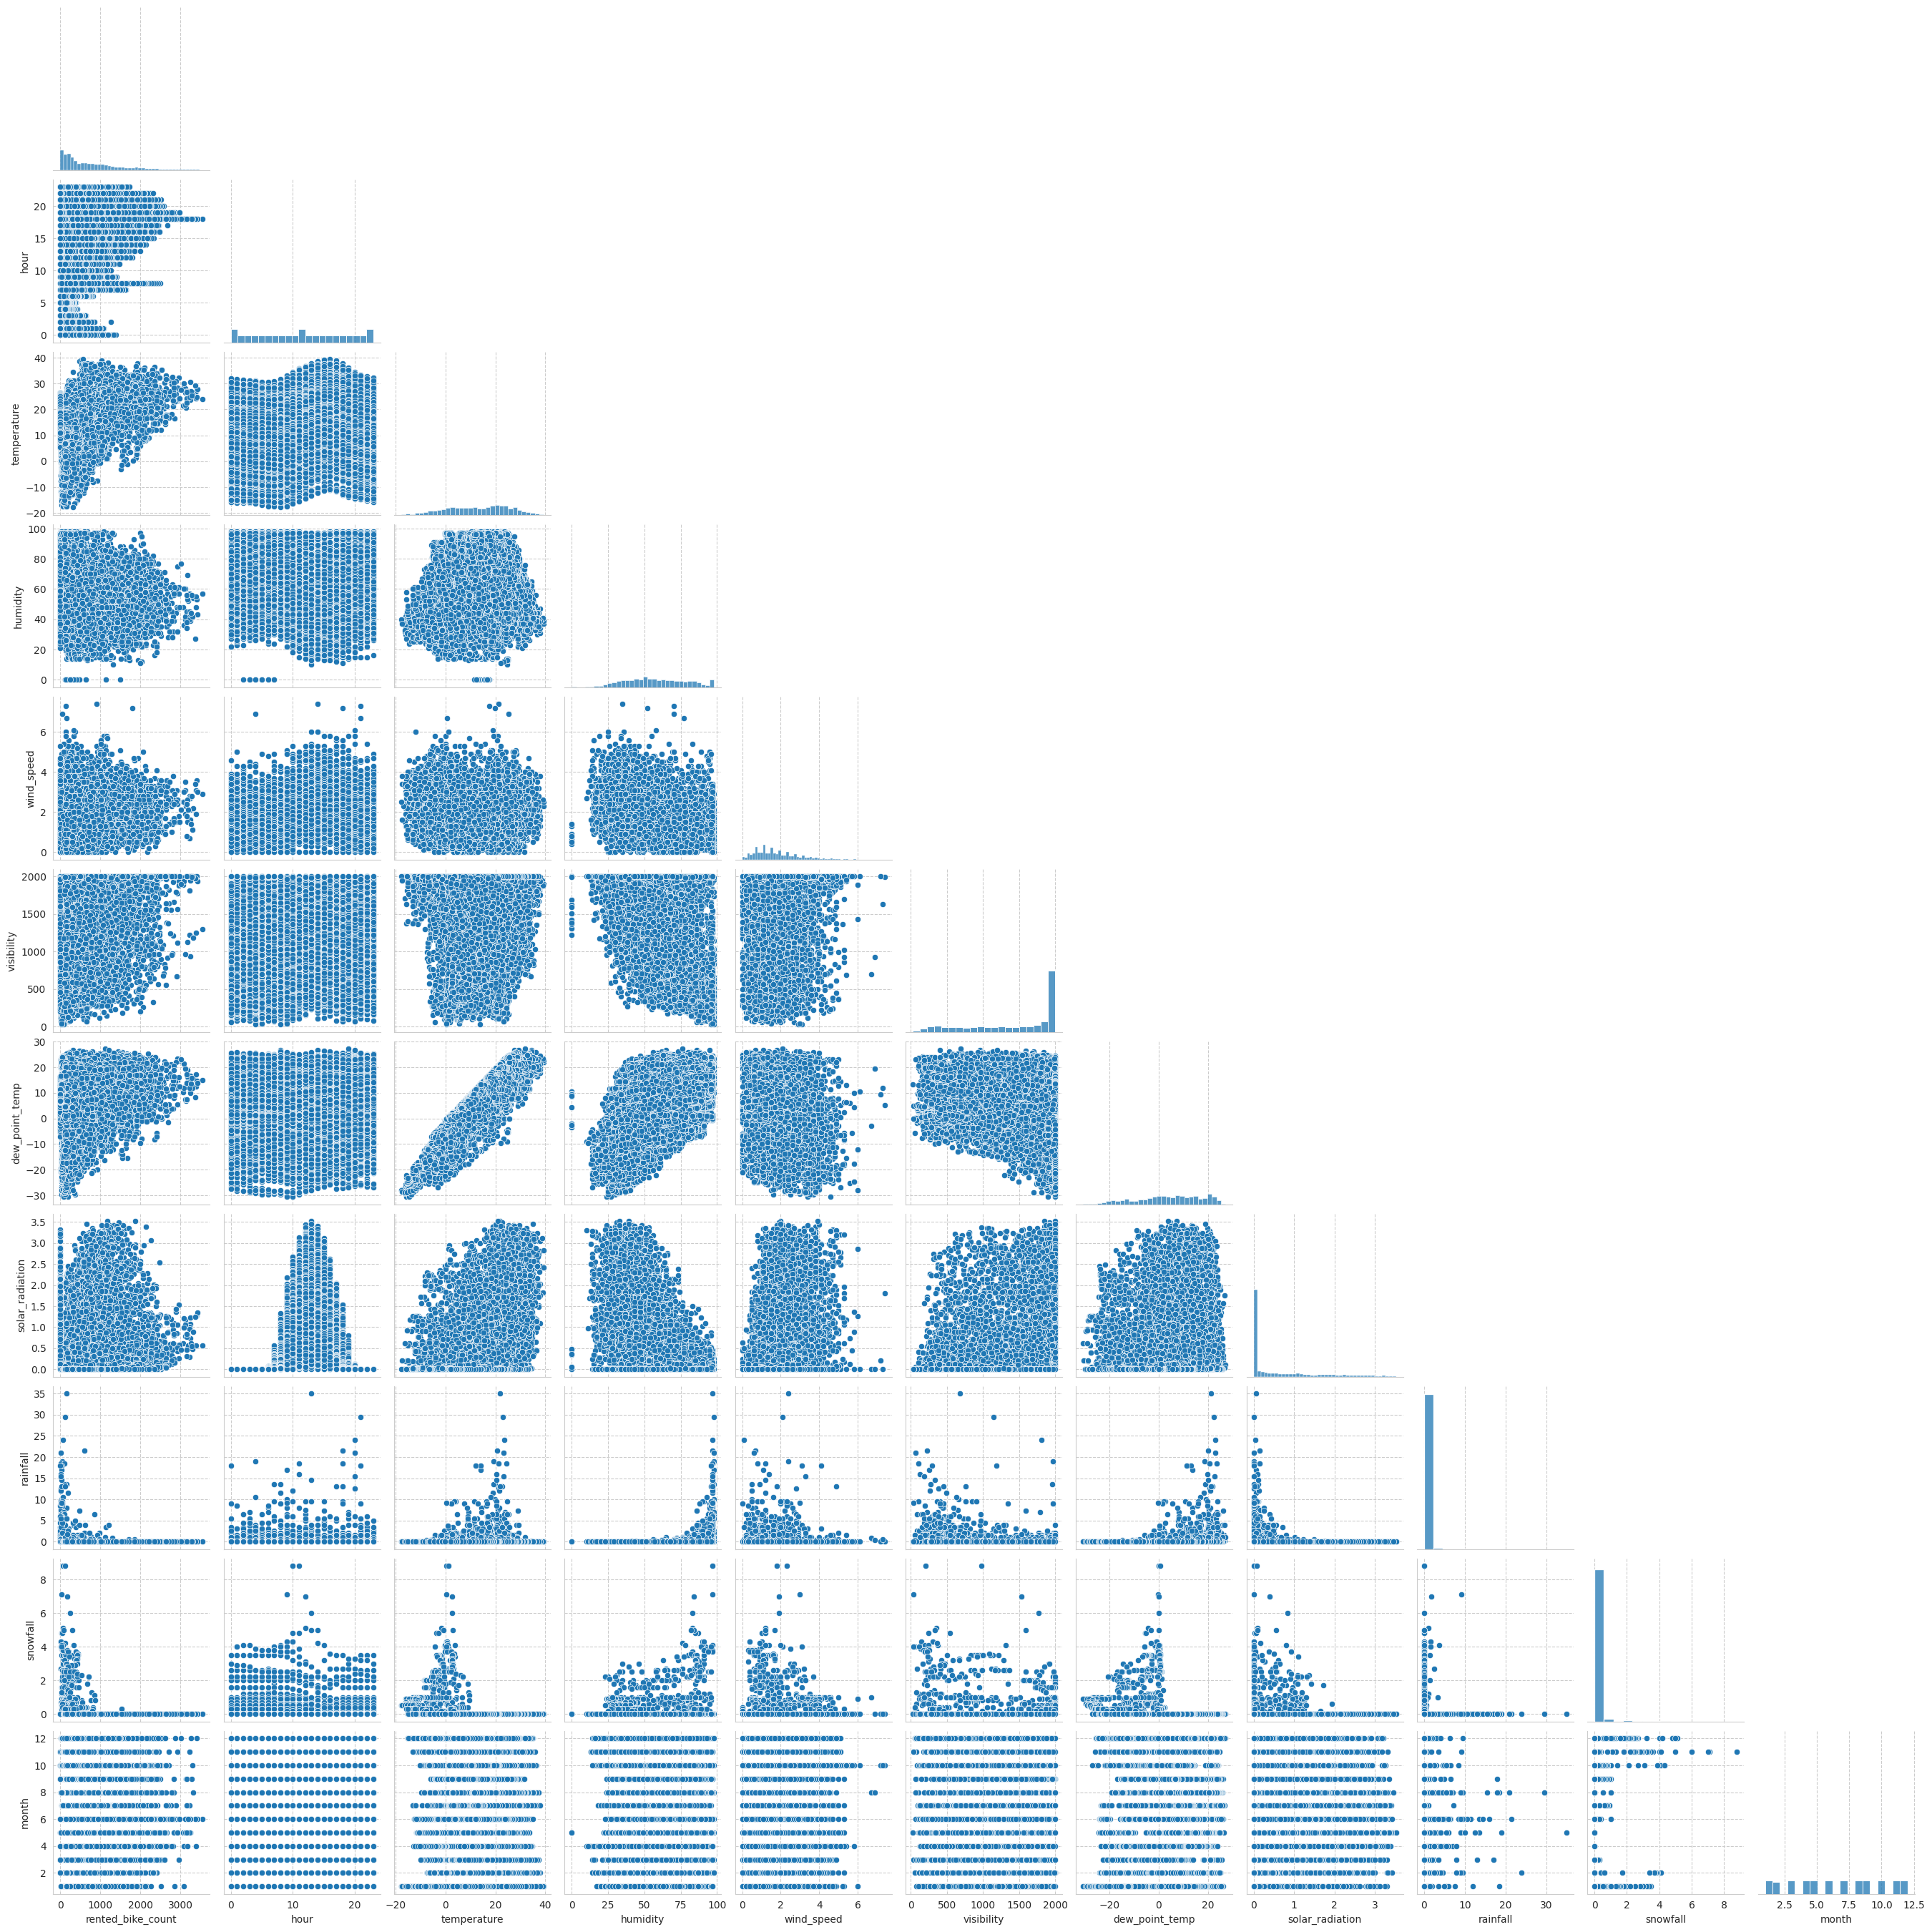

In [45]:
# Plot pairwise relationships in the dataset
sns.pairplot(df, corner=True)


**1. Why did you pick the specific chart?**

* Pairplot is a useful tool for visualizing patterns and relationships between variables in a dataset.

* In a pairplot, each variable is plotted against all other variables in the dataset, resulting in a grid of scatterplots. 
* The diagonal of the grid shows the distribution of each variable, while the lower diagonal shows the scatterplots of the pairwise relationships between the variables. The upper diagonal is a mirror image of the lower diagonal, showing the same scatterplots, but with the axes flipped.
* Pairplots are useful for identifying patterns and relationships between variables, such as linear or nonlinear relationships, clusters, and outliers. They can also be used to identify which variables are strongly correlated with each other.

**2. What is/are the insight(s) found from the chart?**

* The resulting plot will show scatterplots of each pair of features along with the distributions of each individual feature.

**3. Will the gained insights help creating a positive business impact?** 

* The insights gained from a pair plot can definitely help create a positive business impact. By identifying any patterns or relationships between variables, businesses can make more informed decisions and improve their operations.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

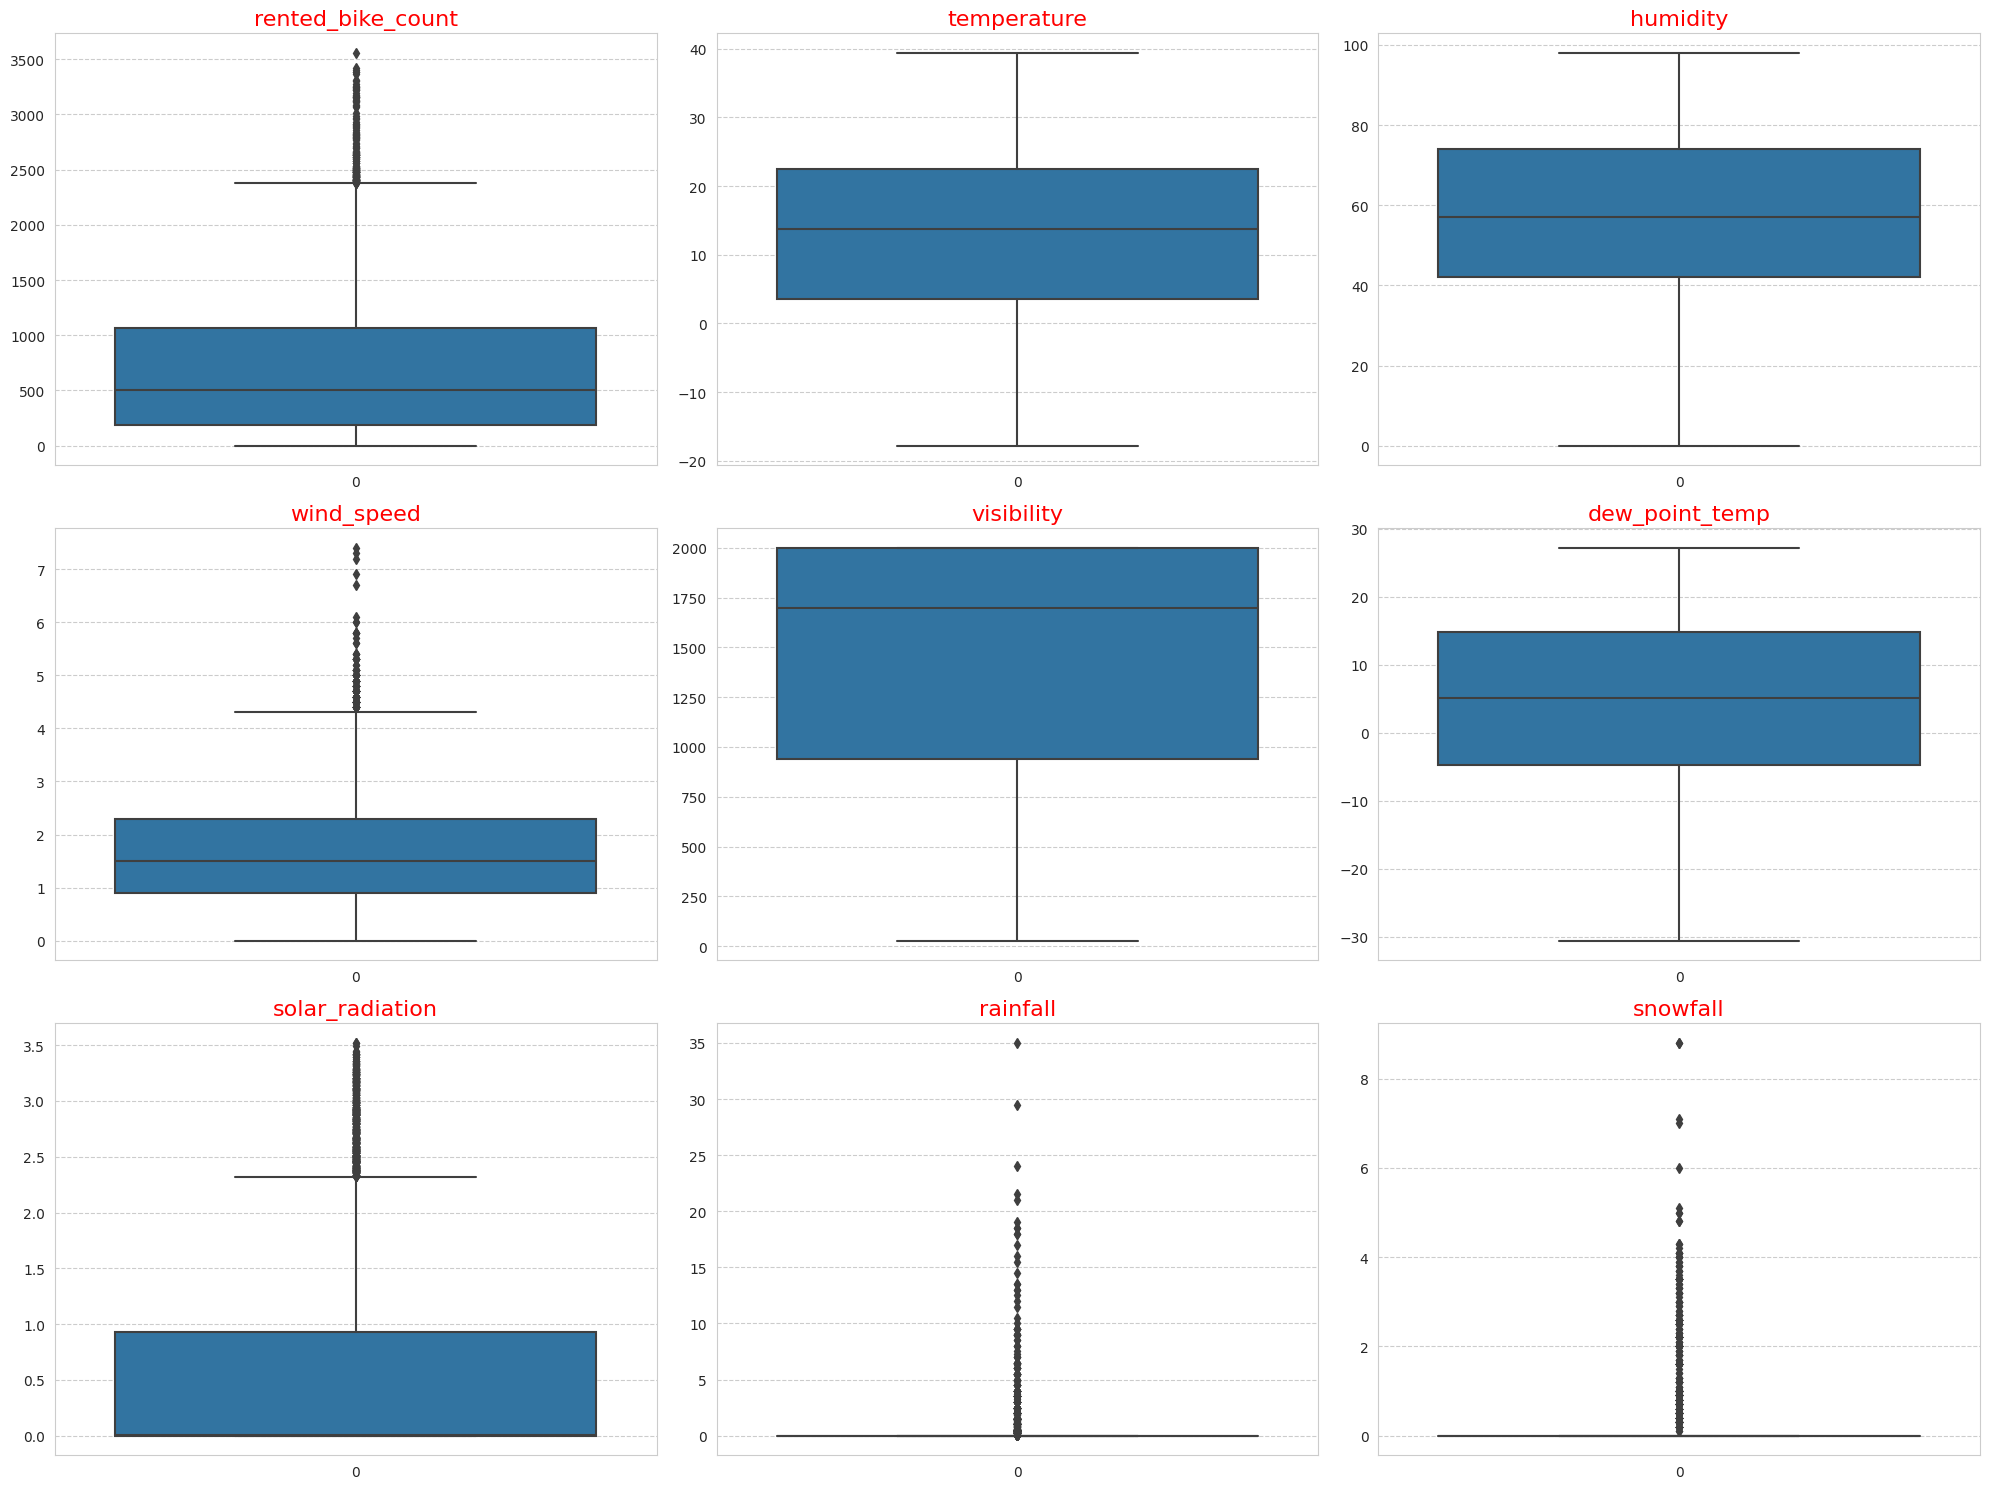

In [46]:
# checking Outliers in numeric features using seaborn boxplot

plt.figure(figsize=(20,15))

for i,feature in enumerate(num_col):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[feature])
  plt.title(feature, fontsize=16,color='red')
  plt.tight_layout()

* It is not always necessary to remove outliers from a dataset, especially if the data is continuous and represents real-world measurements.
* In the case of rainfall and snowfall data, if the outliers are due to extreme weather events or other natural phenomena, they may represent important information that should not be removed. 

## Check Correlation and Multicollinearity between features

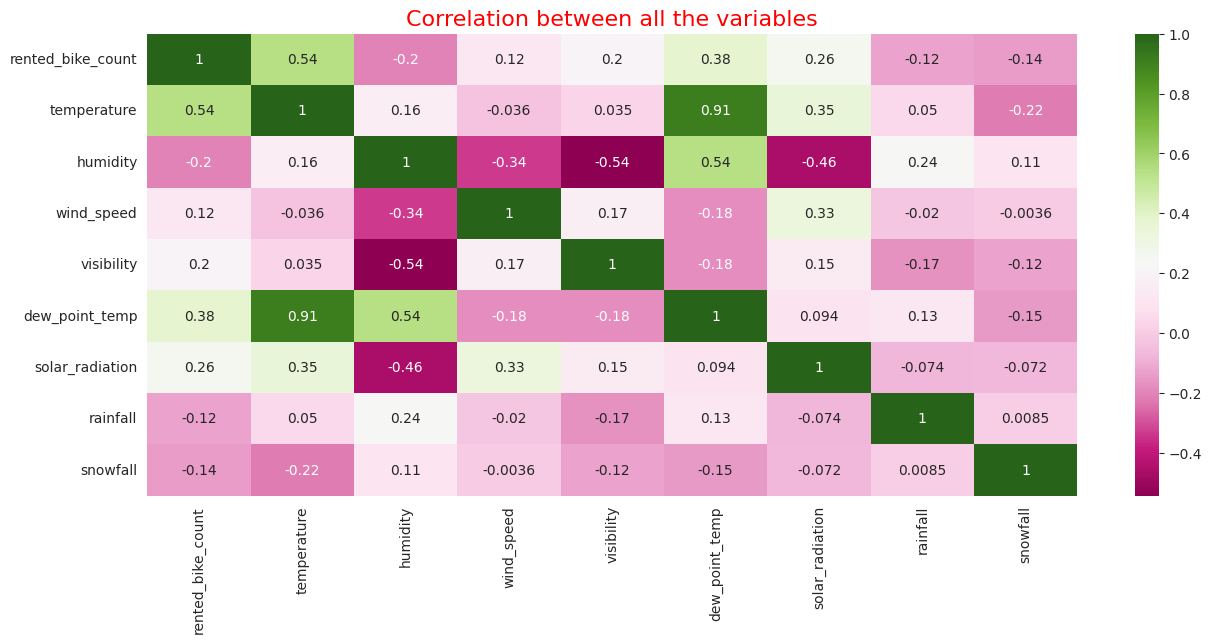

In [47]:
#checking correlation between independent features using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16,color='red')
plt.show()

* The correlation heatmap indicates a high positive correlation of 0.91 between 'Temperature' and 'Dew point temperature', suggesting that dropping one of the columns would not significantly affect our analysis. Therefore, we can drop the 'Dew point temperature(°C)' column since it has the same variation as 'Temperature'.

* To ensure there is no collinearity between other variables, we will check their VIF values before proceeding further.

**What is Variance Inflation Factor (VIF)?**
 
* VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.
* Here, we have performed the VIF calculations for the clarity about the correlation between the features. after that, we have dropped the features which were highly correlated with any other independent features for accurate predictions.

In [48]:
# Function to calculate Multicollinearity

# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  vif_data['VIF'] = round(vif_data['VIF'],2)
  return(vif_data)

In [49]:
calc_vif(df[[i for i in df.describe().columns]])

feature    VIF
0  rented_bike_count   3.62
1        temperature  34.56
2           humidity   5.09
3         wind_speed   4.57
4         visibility   9.06
5     dew_point_temp  16.04
6    solar_radiation   2.89
7           rainfall   1.10
8           snowfall   1.12

* From heatmap and VIF, we can clearly visible Temperature and Dew point temperature(°C) has the high correlation and high multicollinearity respectively. As a result, to reduce correlation and multicollinearity We can drop dew point temperature column.

In [50]:
# Drop Dew Point Temperature Column

df.drop(columns= ['dew_point_temp'], inplace=True)

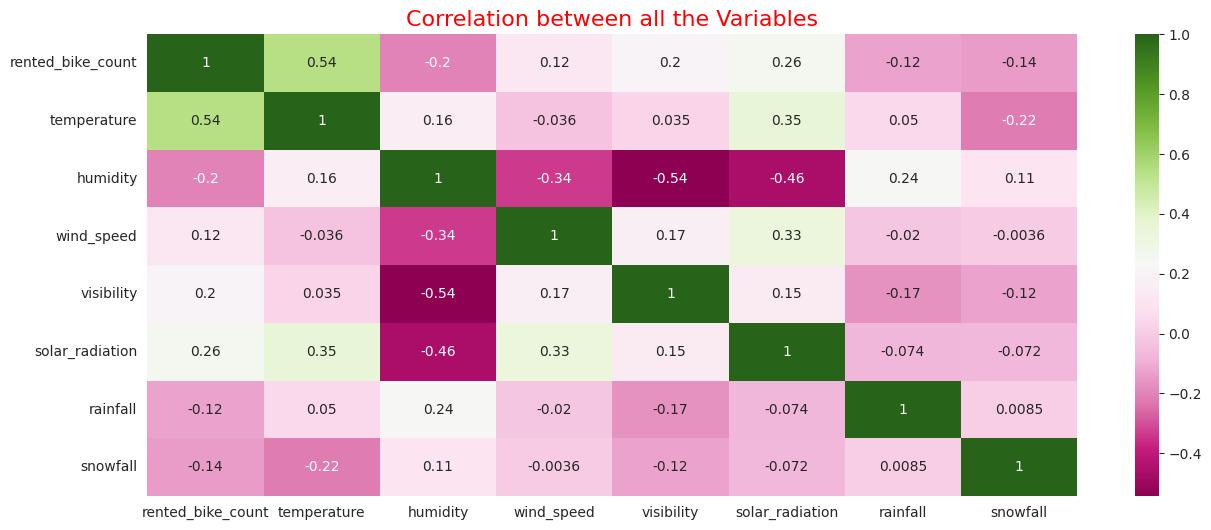

In [51]:
# Again plot correlation using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the Variables', size=16, color='red')
plt.show()

In [52]:
# Again check multicolinearilty
calc_vif(df[[i for i in df.describe().columns]])

feature   VIF
0  rented_bike_count  3.43
1        temperature  4.42
2           humidity  4.83
3         wind_speed  4.21
4         visibility  4.71
5    solar_radiation  2.25
6           rainfall  1.10
7           snowfall  1.12

**1. Why did you pick the specific chart?**

* Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables. It is used to determine whether and how strongly two variables are related to each other.

**2. What is/are the insight(s) found from the chart?**

* After removable of dew point temperature column, correlation between dependent variable and multicollinearity could be controlled.

## Convert unappropriate columns to appropriate columns for Machine learning

In [53]:
#Changing the int64 column into category column
cols=['hour','month','weekdays_weekend']
for col in cols:
  df[col]= df[col].astype('category')


Converting snowfall, rainfall and visibility to categorical attributes:
* Since there are vary few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

In [54]:
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda x: 1 if x>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda x: 1 if x>0 else 0)

Converting visibility to a categorical attribute:

When
* Visibility >= 20 Km ---> Clear (high visibility)
* 4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
* Visibility < 4 Km ---> Fog (low visibility)

In [55]:
# Binning the 'visibility' column into 3 categories using Pandas cut() function.

df['visibility'] = pd.cut(df.visibility,bins=[0,399,999,2001],labels=[0,1,2])

In [56]:
# Converting categorical columns to numerical using numpy's where() function.

df['func_day'] = np.where(df['func_day'] == 'Yes',1,0)
df['holiday'] = np.where(df['holiday'] == 'Holiday', 1,0)

'month', 'day_of_week', 'hour' are nominal categorical variables, therefore we have to apply onehot encoding.

In [57]:
# Converting categorical to float and integer

df['visibility'] = df['visibility'].astype(float)
df['weekdays_weekend'] = df['weekdays_weekend'].astype(int)


In [58]:
df.head(5)

rented_bike_count hour  temperature  humidity  wind_speed  visibility  \
0                254    0         -5.2        37         2.2         2.0   
1                204    1         -5.5        38         0.8         2.0   
2                173    2         -6.0        39         1.0         2.0   
3                107    3         -6.2        40         0.9         2.0   
4                 78    4         -6.0        36         2.3         2.0   

   solar_radiation  rainfall  snowfall seasons  holiday  func_day month  \
0              0.0         0         0  Winter        0         1     1   
1              0.0         0         0  Winter        0         1     1   
2              0.0         0         0  Winter        0         1     1   
3              0.0         0         0  Winter        0         1     1   
4              0.0         0         0  Winter        0         1     1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [59]:
# One-Hot Encoding of Categorical Features in Dataset
df= pd.get_dummies(df,columns = ['month','hour','seasons'],drop_first=True)

In [60]:
df.keys()

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'func_day', 'weekdays_weekend', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'seasons_Spring', 'seasons_Summer', 'seasons_Winter'],
      dtype='object')

In [61]:
df.shape

(8760, 48)

In [62]:
# Assigning the value of independent variable (X) and dependent variable (Y) :

X = df.drop(columns=['rented_bike_count'], axis=1)
y = np.sqrt(df['rented_bike_count'])

In [63]:
# final independent feature look

X.head()

temperature  humidity  wind_speed  visibility  solar_radiation  rainfall  \
0         -5.2        37         2.2         2.0              0.0         0   
1         -5.5        38         0.8         2.0              0.0         0   
2         -6.0        39         1.0         2.0              0.0         0   
3         -6.2        40         0.9         2.0              0.0         0   
4         -6.0        36         2.3         2.0              0.0         0   

   snowfall  holiday  func_day  weekdays_weekend  ...  hour_17  hour_18  \
0         0        0         1                 0  ...        0        0   
1         0        0         1                 0  ...        0        0   
2         0        0         1                 0  ...        0        0   
3         0        0         1                 0  ...        0        0   
4         0        0         1                 0  ...        0        0   

   hour_19  hour_20  hour_21  hour_22  hour_23  seasons_Spring  \
0        0        0        0        0        0               0   
1        0        0        0        0        0               0   
2        0        0        0        0        0               0   
3        0        0        0        0        0               0   
4        0        0        0        0        0               0   

   seasons_Summer  seasons_Winter  
0               0               1  
1               0               1  
2               0               1  
3               0               1  
4               0               1  

[5 rows x 47 columns]

### 8. Data Splitting

In [64]:
# Dividing the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train

temperature  humidity  wind_speed  visibility  solar_radiation  \
5316         24.1        80         0.8         2.0             0.72   
5845         37.9        38         2.3         2.0             3.05   
3586         17.5        35         1.8         2.0             2.26   
3054          1.7        58         3.8         2.0             0.00   
6805         27.1        38         1.7         2.0             2.56   
...           ...       ...         ...         ...              ...   
4373         17.8        75         1.0         2.0             0.00   
7891         16.4        47         1.0         2.0             0.00   
4859         25.5        57         1.8         1.0             3.01   
3264          8.3        59         2.1         2.0             0.00   
2732          7.1        83         3.3         0.0             0.00   

      rainfall  snowfall  holiday  func_day  weekdays_weekend  ...  hour_17  \
5316         0         0        0         1                 1  ...        0   
5845         0         0        0         1                 0  ...        0   
3586         0         0        0         1                 1  ...        0   
3054         0         0        0         1                 0  ...        0   
6805         0         0        0         1                 0  ...        0   
...        ...       ...      ...       ...               ...  ...      ...   
4373         0         0        0         1                 1  ...        0   
7891         0         0        0         1                 0  ...        0   
4859         0         0        0         1                 0  ...        0   
3264         0         0        0         1                 0  ...        0   
2732         0         0        0         1                 1  ...        0   

      hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  seasons_Spring  \
5316        0        0        0        0        0        0               0   
5845        0        0        0        0        0        0               0   
3586        0        0        0        0        0        0               1   
3054        0        0        0        0        0        0               1   
6805        0        0        0        0        0        0               0   
...       ...      ...      ...      ...      ...      ...             ...   
4373        0        0        0        0        0        0               0   
7891        0        1        0        0        0        0               0   
4859        0        0        0        0        0        0               0   
3264        0        0        0        0        0        0               1   
2732        0        0        1        0        0        0               1   

      seasons_Summer  seasons_Winter  
5316               1               0  
5845               1               0  
3586               0               0  
3054               0               0  
6805               0               0  
...              ...             ...  
4373               1               0  
7891               0               0  
4859               1               0  
3264               0               0  
2732               0               0  

[6132 rows x 47 columns]

**What data splitting ratio have you used and why?** 
* Dividing the data into training and testing sets is a common approach in machine learning to evaluate the performance of a model. The idea is to use the training data to estimate the parameters of the model, and the testing data to evaluate the performance of the model on new, unseen data.

* By dividing the data into an 80/20 ratio, you are following the Pareto principle, which states that 80% of the effects come from 20% of the causes. In this case, the 80% of the data is used for training, and 20% is used for testing. This split ensures that you have enough data to accurately estimate the parameters of the model while also having enough data to accurately evaluate its performance.

* However, it's important to note that the choice of split ratio (80/20 or any other) depends on the size of your dataset and the complexity of your model. If you have a large dataset, you may be able to use a smaller ratio (e.g., 70/30), while if you have a small dataset, you may need to use a larger ratio (e.g., 90/10). 

* In general, the goal is to find the right balance between the variance of the parameter estimates and the variance of the performance statistics, so that neither is too high. Therefore, I choose 70:30 ratio.




## Data Scaling

In [65]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Which method have you used to scale you data and why?

* I used MinMaxscaler as it preserves the shape of the original distribution. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

In [67]:
X_train_scaled

temperature  humidity  wind_speed  visibility  solar_radiation  \
0        0.732394  0.816327    0.108108         1.0         0.204545   
1        0.975352  0.387755    0.310811         1.0         0.866477   
2        0.616197  0.357143    0.243243         1.0         0.642045   
3        0.338028  0.591837    0.513514         1.0         0.000000   
4        0.785211  0.387755    0.229730         1.0         0.727273   
...           ...       ...         ...         ...              ...   
6127     0.621479  0.765306    0.135135         1.0         0.000000   
6128     0.596831  0.479592    0.135135         1.0         0.000000   
6129     0.757042  0.581633    0.243243         0.5         0.855114   
6130     0.454225  0.602041    0.283784         1.0         0.000000   
6131     0.433099  0.846939    0.445946         0.0         0.000000   

      rainfall  snowfall  holiday  func_day  weekdays_weekend  ...  hour_17  \
0          0.0       0.0      0.0       1.0               1.0  ...      0.0   
1          0.0       0.0      0.0       1.0               0.0  ...      0.0   
2          0.0       0.0      0.0       1.0               1.0  ...      0.0   
3          0.0       0.0      0.0       1.0               0.0  ...      0.0   
4          0.0       0.0      0.0       1.0               0.0  ...      0.0   
...        ...       ...      ...       ...               ...  ...      ...   
6127       0.0       0.0      0.0       1.0               1.0  ...      0.0   
6128       0.0       0.0      0.0       1.0               0.0  ...      0.0   
6129       0.0       0.0      0.0       1.0               0.0  ...      0.0   
6130       0.0       0.0      0.0       1.0               0.0  ...      0.0   
6131       0.0       0.0      0.0       1.0               1.0  ...      0.0   

      hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  seasons_Spring  \
0         0.0      0.0      0.0      0.0      0.0      0.0             0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0             0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0             1.0   
3         0.0      0.0      0.0      0.0      0.0      0.0             1.0   
4         0.0      0.0      0.0      0.0      0.0      0.0             0.0   
...       ...      ...      ...      ...      ...      ...             ...   
6127      0.0      0.0      0.0      0.0      0.0      0.0             0.0   
6128      0.0      1.0      0.0      0.0      0.0      0.0             0.0   
6129      0.0      0.0      0.0      0.0      0.0      0.0             0.0   
6130      0.0      0.0      0.0      0.0      0.0      0.0             1.0   
6131      0.0      0.0      1.0      0.0      0.0      0.0             1.0   

      seasons_Summer  seasons_Winter  
0                1.0             0.0  
1                1.0             0.0  
2                0.0             0.0  
3                0.0             0.0  
4                0.0             0.0  
...              ...             ...  
6127             1.0             0.0  
6128             0.0             0.0  
6129             1.0             0.0  
6130             0.0             0.0  
6131             0.0             0.0  

[6132 rows x 47 columns]

## ***7. ML Model Implementation***

## ML Model - 7.1: Linear Regression

In [68]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [69]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [70]:
# Checking score
regg.score(X_train,y_train)

0.7891139850734388

In [71]:
#Checking Coefficent
regg.coef_

array([  0.45888742,  -0.0943934 ,  -0.08068246,   0.58791052,
         0.72553498, -13.15399129,   0.67508524,  -2.82518795,
        28.09831945,  -0.86300507,  -0.32354253,   0.36475285,
         0.86590895,   2.21294517,   4.62549472,  -0.237373  ,
        -0.35188767,   0.85650505,   2.25674476,   1.02357526,
         1.47635369,  -2.57863076,  -5.41177873,  -6.99753407,
       -10.03409665,  -9.43647827,  -4.19627519,   1.56880212,
         6.97288397,   1.22867864,  -3.03224017,  -3.178196  ,
        -2.12544943,  -2.28176851,  -2.33195549,  -1.05170689,
         1.01761207,   4.51826413,  10.86293075,   7.19517637,
         5.8988407 ,   6.30839957,   4.72810954,   1.04310047,
        -2.40871619,  -3.09142026,  -6.92857371])

### **Evaluation on the Test Set**

### **Metrics**
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [72]:
# Performance Metrics calculation function 
def print_metrics(actual, predicted):
  print('MSE is: {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is: {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 score: is {}'.format(r2_score(actual, predicted)))
  print('MAE is: {}'.format(mean_absolute_error(actual, predicted)))
  

In [73]:
MSE = mean_squared_error((y_train), (y_pred_train))
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error((y_train), (y_pred_train))
R2 = r2_score((y_train), (y_pred_train))
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [74]:
#Adjusted R2 (considers and tests different independent variables against the model)
def Adjusted_R2(actual, predicted):
  Adj_R2 = (1-(1-r2_score(actual, predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  return('Adjusted R2 :', Adj_R2)


In [75]:
print_metrics(y_train, y_pred_train)
Adjusted_R2(y_train, y_pred_train)

MSE is: 32.80384856576111
RMSE is: 5.727464409820554
R2 score: is 0.7891139850734388
MAE is: 4.392472965268571


('Adjusted R2 :', 0.7852722630960944)

In [76]:
print_metrics(y_test, y_pred_test)
Adjusted_R2(y_test, y_pred_test)

MSE is: 32.934135223837465
RMSE is: 5.7388269902339335
R2 score: is 0.7855823850451128
MAE is: 4.444689730865402


('Adjusted R2 :', 0.7816763277184152)

* The linear regression model has a MSE of 32.93, which means that on average, the predicted values differ from the actual values by 5.74 (RMSE) units in the original units of the target variable. 
* The R2 score of 0.79 indicates that the model explains around 79% of the variance in the target variable, which is a good fit. 
* The MAE of 4.44 indicates that the average absolute difference between the predicted and actual values is 4.44 units in the original units of the target variable. 
* The adjusted R2 score of 0.78 suggests that the model is not overfitting, taking into account the number of features in the model. 

* Overall, these results suggest that the linear regression model is a good fit for the data and can be used to make predictions on new data.

In [77]:
# If our model is perfect, residuals would all be zeros
test_residuals = y_test - y_pred_test
test_residuals

4059     0.840036
6914    -0.203349
233     -7.869807
982     -4.910193
5967   -13.346068
          ...    
2909    -5.015577
2244    -0.616682
5121    -0.425597
322      2.452886
2731    -3.269617
Name: rented_bike_count, Length: 2628, dtype: float64

In [ ]:
# residual plot
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--');

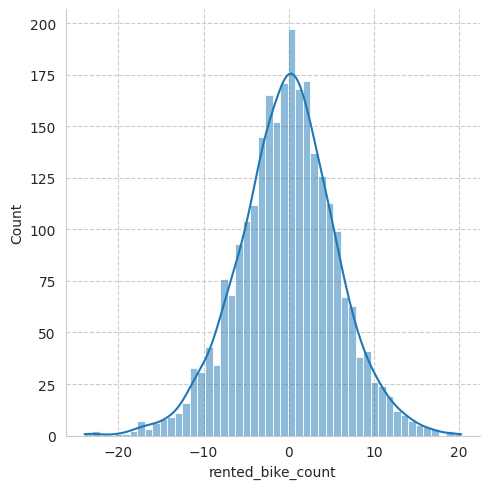

In [78]:
# Check Normal probability plot
sns.displot(test_residuals, bins=50, kde=True);

In [79]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
_ = sp.stats.probplot(test_residuals,plot=ax)

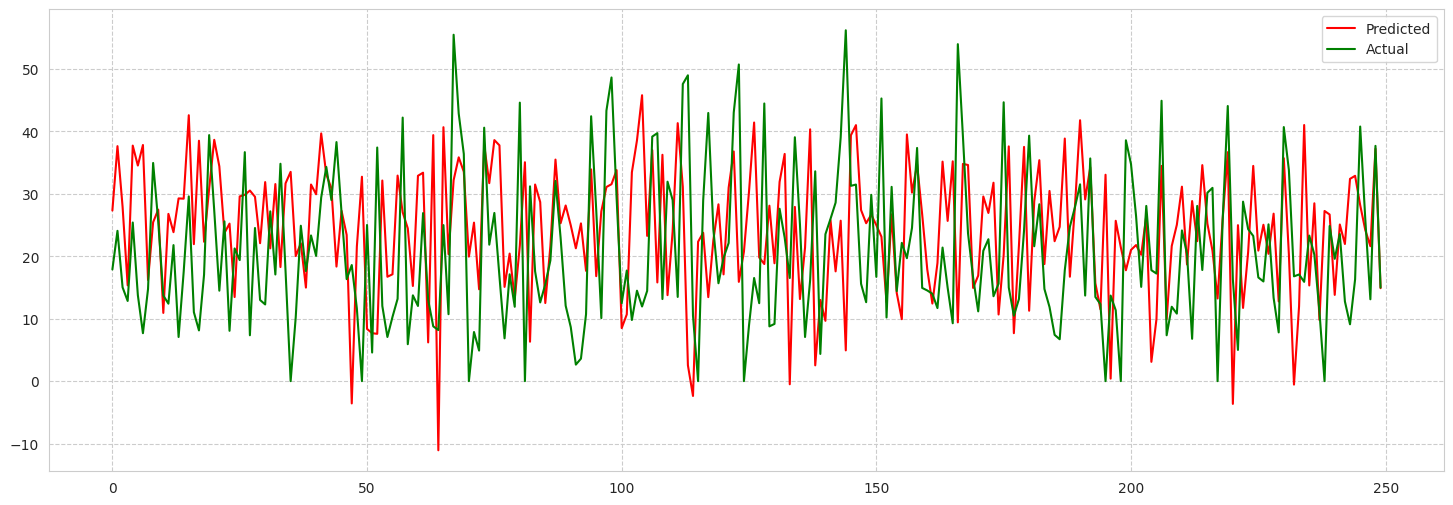

In [80]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(y_pred_train[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Linear model')

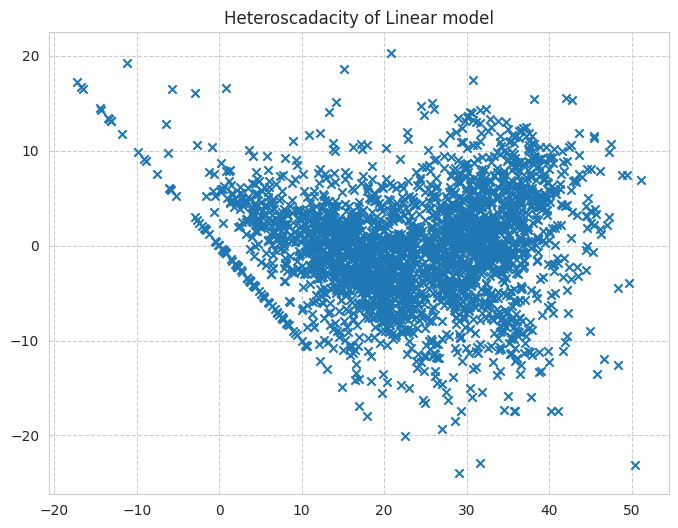

In [81]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')
plt.title('Heteroscadacity of Linear model')

## **Observation:**

* From residual and normal Probability plot, it is clearly visible our model is not perfect. We have to go for next level. 

## **7.2-Polynomial Linear Regression**

* Transform our original data set by adding polynomial features

In [82]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

# polynomial convertion
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [83]:
# Converter "fits" to data, in this case, reads in every X column

poly_features = polynomial_converter.fit_transform(X)

In [84]:
poly_features.shape

(8760, 1175)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [86]:
print_metrics(y_train, y_pred_train)

MSE is: 32.80384856576111
RMSE is: 5.727464409820554
R2 score: is 0.7891139850734388
MAE is: 4.392472965268571


In [87]:
Adjusted_R2(y_test, y_pred_test)

('Adjusted R2 :', 0.7816763277184152)

* The polynomial linear regression model has a slightly lower MSE (32.80) and RMSE (5.73) than the linear regression model, indicating that it has a better fit. 
* The R2 score of 0.79 indicates that the model explains around 79% of the variance in the target variable, which is a good fit. 
* The MAE of 4.39 is also slightly lower than the MAE of the linear regression model, indicating that the average absolute difference between the predicted and actual values is slightly smaller. 
* The adjusted R2 score is the same as the linear regression model (0.78), suggesting that the polynomial model is not overfitting.

* Overall, these results suggest that the polynomial linear regression model is a better fit for the data than the linear regression model and can be used to make more accurate predictions on new data.

## **7.3-Regularized Linear Regression**

Regularization attempts to minimize the RSS (residual sum of squares) and a penalty factor. This penalty factor will penalize models that have coefficients that are too large.

### **7.3.1-Ridge Regression(L2 regularization)**

In [88]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score

ridge.score(X_train,y_train)

0.7891138833815793

In [89]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

### **Choosing an Alpha value with cross-validation**

In [90]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error',cv=5)

In [91]:
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

0.1

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [92]:
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 32.934135223837465
RMSE is: 5.7388269902339335
R2 score: is 0.7855823850451128
MAE is: 4.444689730865402


('Adjusted R2 :', 0.7816763277184152)

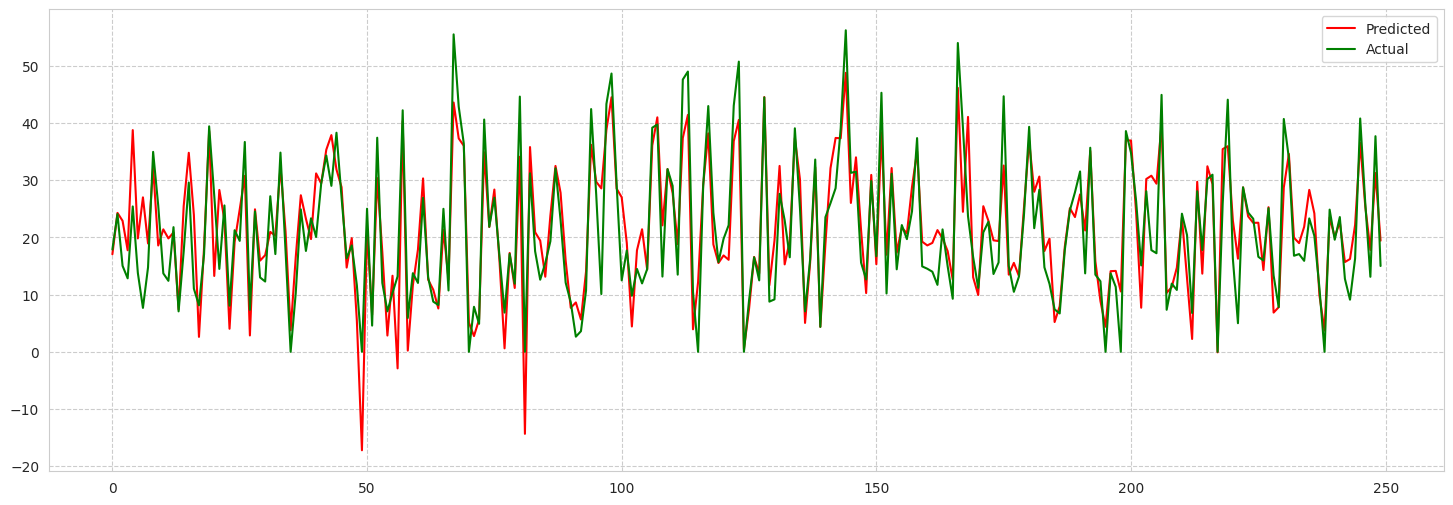

In [93]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Ridge regression model')

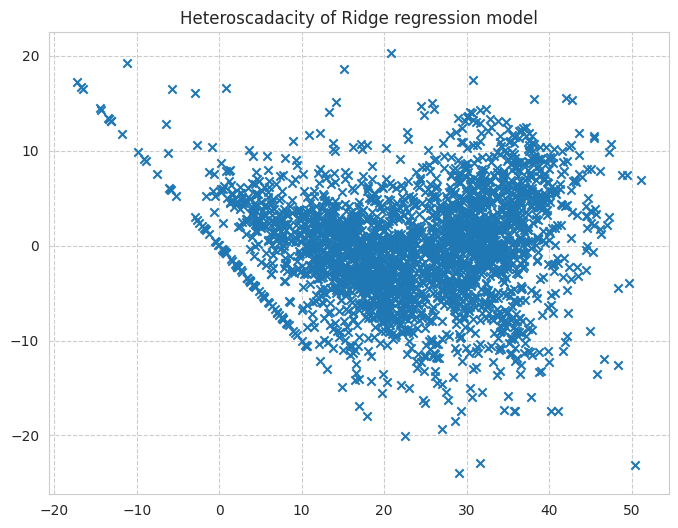

In [94]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Ridge regression model')

* The ridge regression model has similar results to the linear regression model, with a slightly higher MSE (32.93) and RMSE (5.74) but a similar R2 score of 0.79. The MAE of 4.44 is also similar to the linear regression model. The adjusted R2 score is slightly lower than the linear regression model (0.78), which suggests that the ridge regression model may be slightly overfitting.

* Overall, these results suggest that the ridge regression model has a similar performance to the linear regression model but may not provide any significant improvement. However, ridge regression can be useful in reducing the impact of multicollinearity among the predictor variables and may improve the stability of the model.

### **7.3.2-Lasso Regression(L1 Regularization) with cross-validation**

In [95]:
from sklearn.linear_model import LassoCV

In [96]:
# Initalizing lasso regression
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=3,max_iter=1000000)
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, max_iter=1000000)

In [97]:
# Creating the model score
print(lasso_cv_model.score(X_test, y_test))
print(lasso_cv_model.score(X_train, y_train))

0.7562829493256928
0.7584644087741594


In [98]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=3, max_iter=1000000)

In [99]:
lasso_cv_model.alpha_

0.08126659786214657

In [100]:
test_predictions = lasso_cv_model.predict(X_test)

In [101]:
# Calculate the performance metrics
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 37.43447246603902
RMSE is: 6.118371716889961
R2 score: is 0.7562829493256928
MAE is: 4.7936601094363605


('Adjusted R2 :', 0.7518431425886027)

In [102]:
# Predicted Train & Test values
y_pred_train_lasso=lasso_cv_model.predict(X_train)
y_pred_test_lasso=lasso_cv_model.predict(X_test)

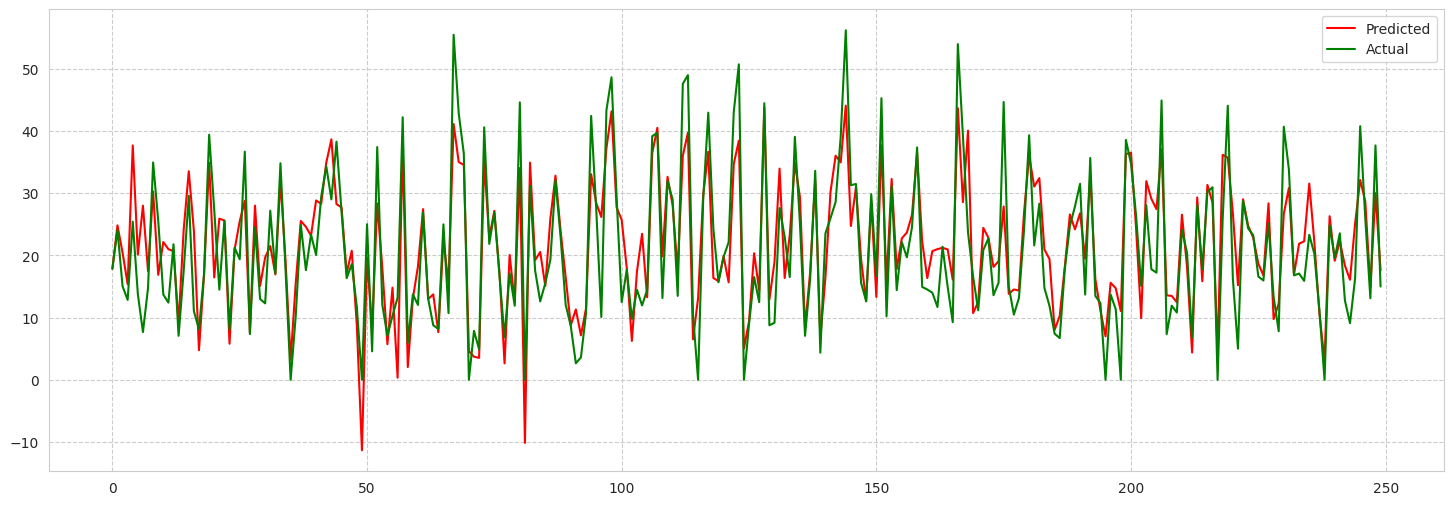

In [103]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Lasso regression model')

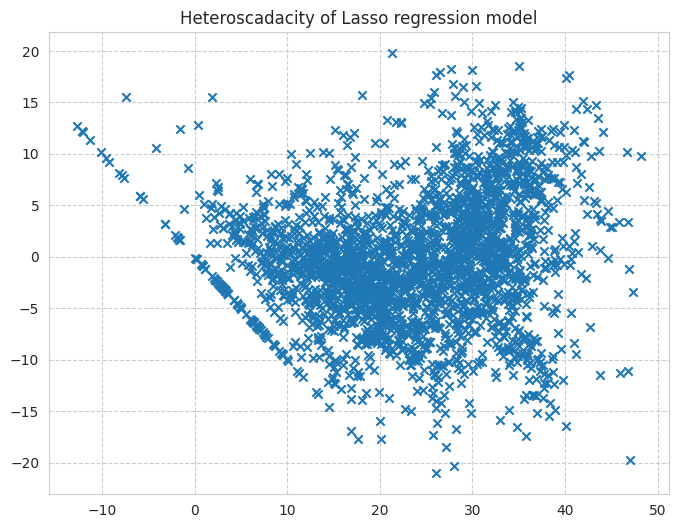

In [104]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Lasso regression model')

* The lasso regression model has a higher MSE (37.43) and RMSE (6.12) compared to both the linear regression and ridge regression models, indicating that it has a worse fit. The R2 score of 0.76 also suggests that the model explains a lower proportion of the variance in the target variable compared to the other models. The MAE of 4.79 is higher than the linear regression model and similar to the ridge regression model. The adjusted R2 score is also lower than the other models (0.75), indicating that the lasso regression model may be overfitting.

* Overall, these results suggest that the lasso regression model does not perform as well as the other models in predicting the target variable. Lasso regression can be useful in selecting a subset of predictor variables and reducing the complexity of the model, but in this case, it seems that the full set of predictor variables may be necessary for a better fit.

### **7.3.3-Elastic Net Regression**

In [105]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [106]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [107]:
#checking score
elnet.score(X_train, y_train)

0.6324586306176305

In [108]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [109]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_en))

MSE is: 57.17198187404866
RMSE is: 7.561215634674669
R2 score: is 0.6324586306176305
MAE is: 5.797433490978797


In [110]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_en))

('Adjusted R2 :', 0.6257631095474866)

In [111]:
print_metrics((y_test), (y_pred_test_en))

MSE is: 58.129782648164834
RMSE is: 7.6242889929595945
R2 score: is 0.6215461778925317
MAE is: 5.86862980506509


In [112]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_en))

('Adjusted R2 :', 0.6146518640789461)

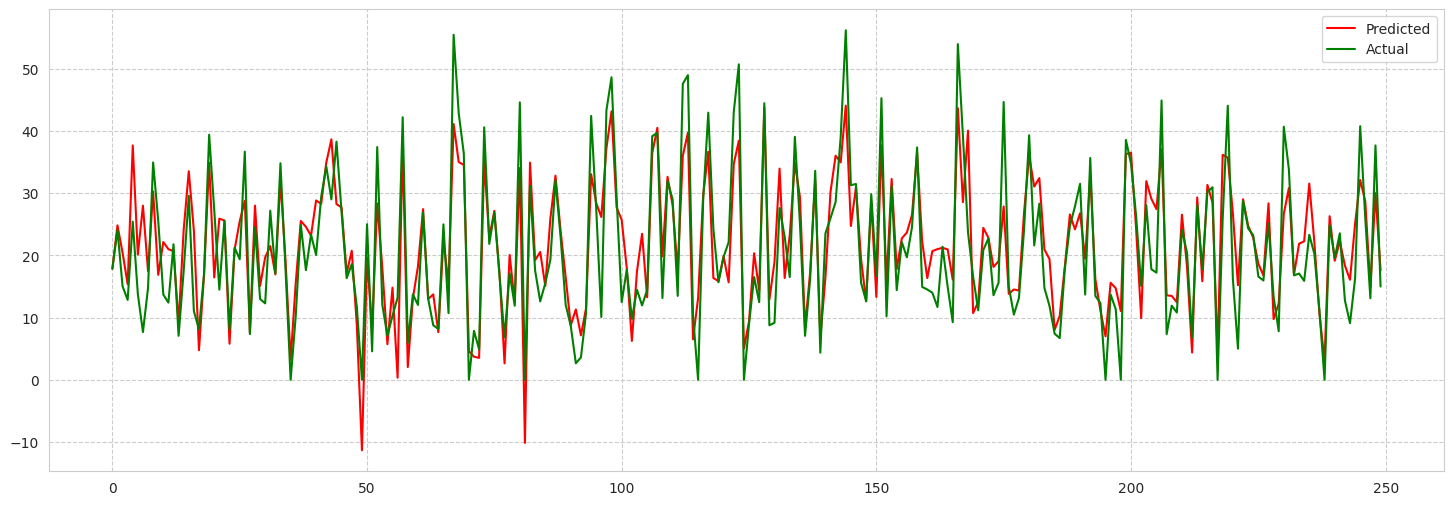

In [113]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Elastic Net regression model')

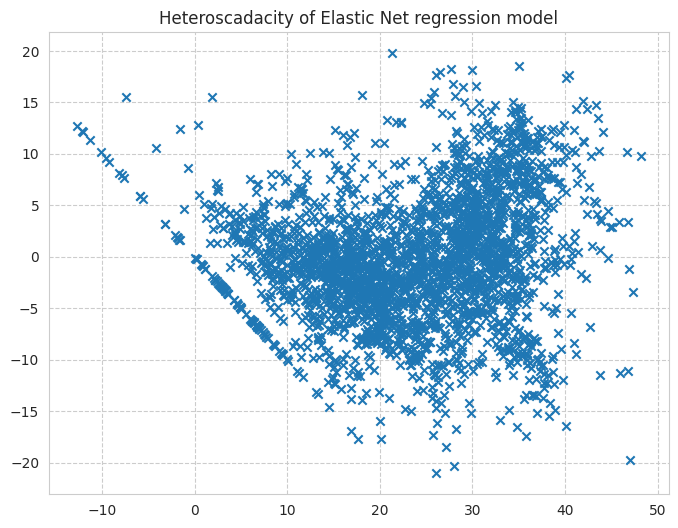

In [114]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Elastic Net regression model')

* The elastic net regression model has a much higher MSE (58.13) and RMSE (7.62) compared to all the other models, indicating that it has a very poor fit. The R2 score of 0.62 also suggests that the model explains a lower proportion of the variance in the target variable compared to the other models. The MAE of 5.87 is the highest among all the models, indicating that the average absolute difference between the predicted and actual values is also the highest.

* Overall, these results suggest that the elastic net regression model does not perform well in predicting the target variable. Elastic net regression can be useful in selecting a subset of predictor variables and reducing the impact of multicollinearity among the predictor variables. However, in this case, it seems that the full set of predictor variables may be necessary for a better fit.

# **7.4-Decision Tree Regression**

In [126]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9, max_leaf_nodes=100)


In [127]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [128]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [129]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_d))

MSE is: 55.26909626281923
RMSE is: 7.434318816328718
R2 score: is 0.6446917063376579
MAE is: 5.47015147269283


In [130]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_d))

MSE is: 60.95149308347771
RMSE is: 7.807143721200328
R2 score: is 0.6031754383081751
MAE is: 5.719913140871


In [131]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_d))

('Adjusted R2 :', 0.6382190358717161)

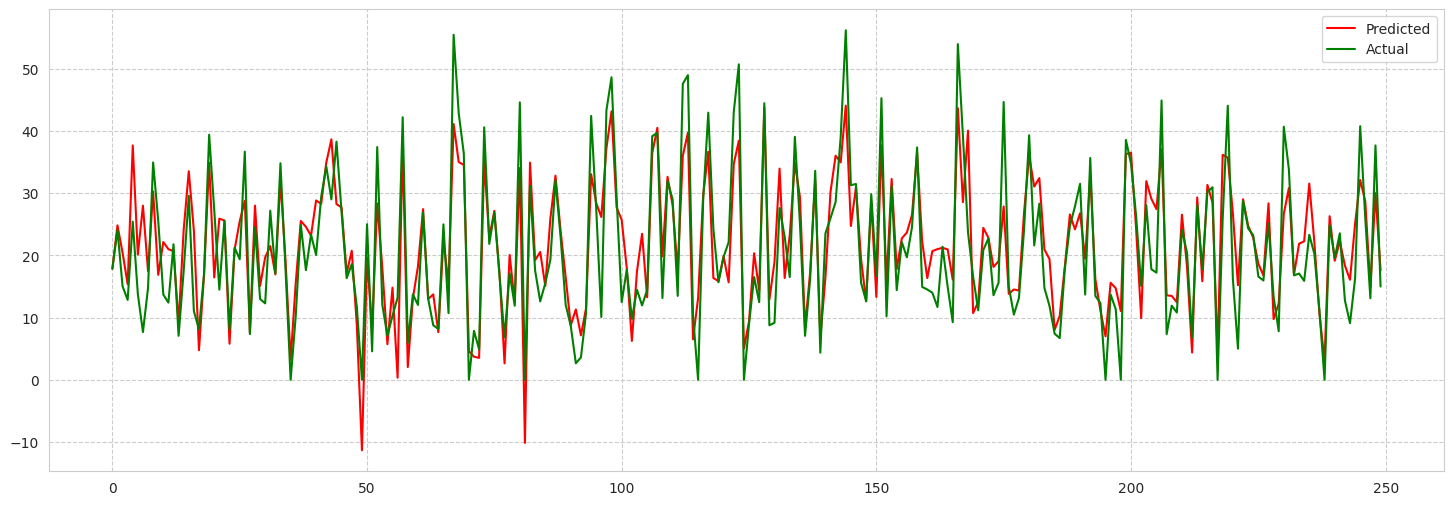

In [132]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Decision Tree regression model')

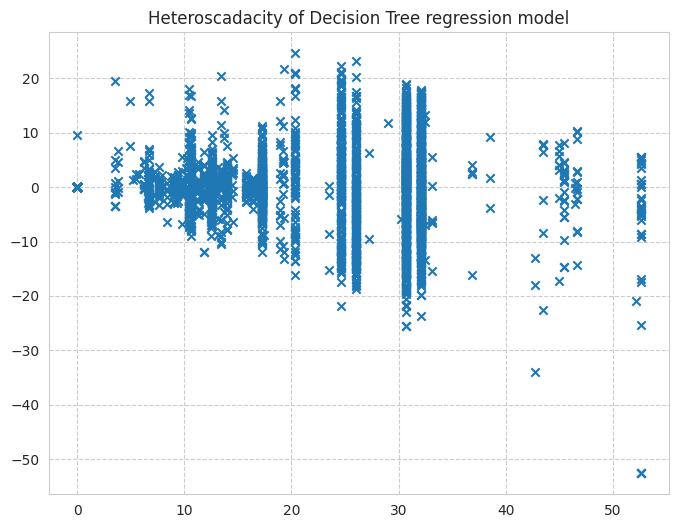

In [133]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')
plt.title('Heteroscadacity of Decision Tree regression model')

* The decision tree model has a moderate fit, with a higher MSE and RMSE compared to linear regression models, but lower MAE than some other models. 
* The adjusted R2 score is the highest among all models, suggesting it may not be overfitting. Decision trees can capture nonlinear relationships, but are prone to overfitting and may not generalize well. 
* Overall, while it has some strengths, other models may be more suitable for this dataset.

## **7.5-Random Forest Regression**

In [134]:
# Initalizing the Model
rf_model = RandomForestRegressor(random_state=0)
parameters = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)
             }

In [135]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [136]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [137]:
#Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_rf))

MSE is: 2.1046371391280894
RMSE is: 1.4507367573505847
R2 score: is 0.9864699247636323
MAE is: 0.9596837017170786


In [138]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_rf))

('Adjusted R2 :', 0.9862234466488612)

In [139]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_rf))

MSE is: 15.951142480285668
RMSE is: 3.993888140682669
R2 score: is 0.8961501219575695
MAE is: 2.644250159794576


In [140]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_rf))

('Adjusted R2 :', 0.8942582830940058)

In [141]:
# Feature importances
rf_model.feature_importances_

array([3.14680034e-01, 1.67806596e-01, 1.57671155e-02, 3.04092221e-03,
       3.64045672e-02, 2.92010693e-02, 7.30893396e-04, 2.60987734e-03,
       1.55603202e-01, 1.05739066e-02, 1.09362019e-03, 2.94070509e-03,
       1.92627010e-03, 1.91066468e-03, 1.75346148e-03, 1.30786611e-03,
       1.84349415e-03, 2.02357466e-03, 2.01754245e-03, 3.17275136e-03,
       8.47278281e-04, 4.44568160e-03, 1.22208345e-02, 1.97763533e-02,
       2.72915818e-02, 2.33698974e-02, 7.78946049e-03, 3.53546100e-03,
       1.24329441e-02, 7.94461199e-04, 2.35680244e-03, 9.08957213e-04,
       2.84558705e-04, 2.21056071e-04, 3.64809258e-04, 1.52297713e-03,
       3.87799728e-03, 1.07020581e-02, 3.12085100e-02, 1.81228540e-02,
       1.27259694e-02, 1.42945681e-02, 1.08502138e-02, 4.00759821e-03,
       6.37524215e-03, 1.57199634e-03, 1.16917434e-02])

In [142]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_scaled.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [143]:
# features = X_train_scaled.columns
# importances = rf_model.feature_importances_
# indices = np.argsort(importances)

In [144]:
plt.style.use('dark_background')

<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

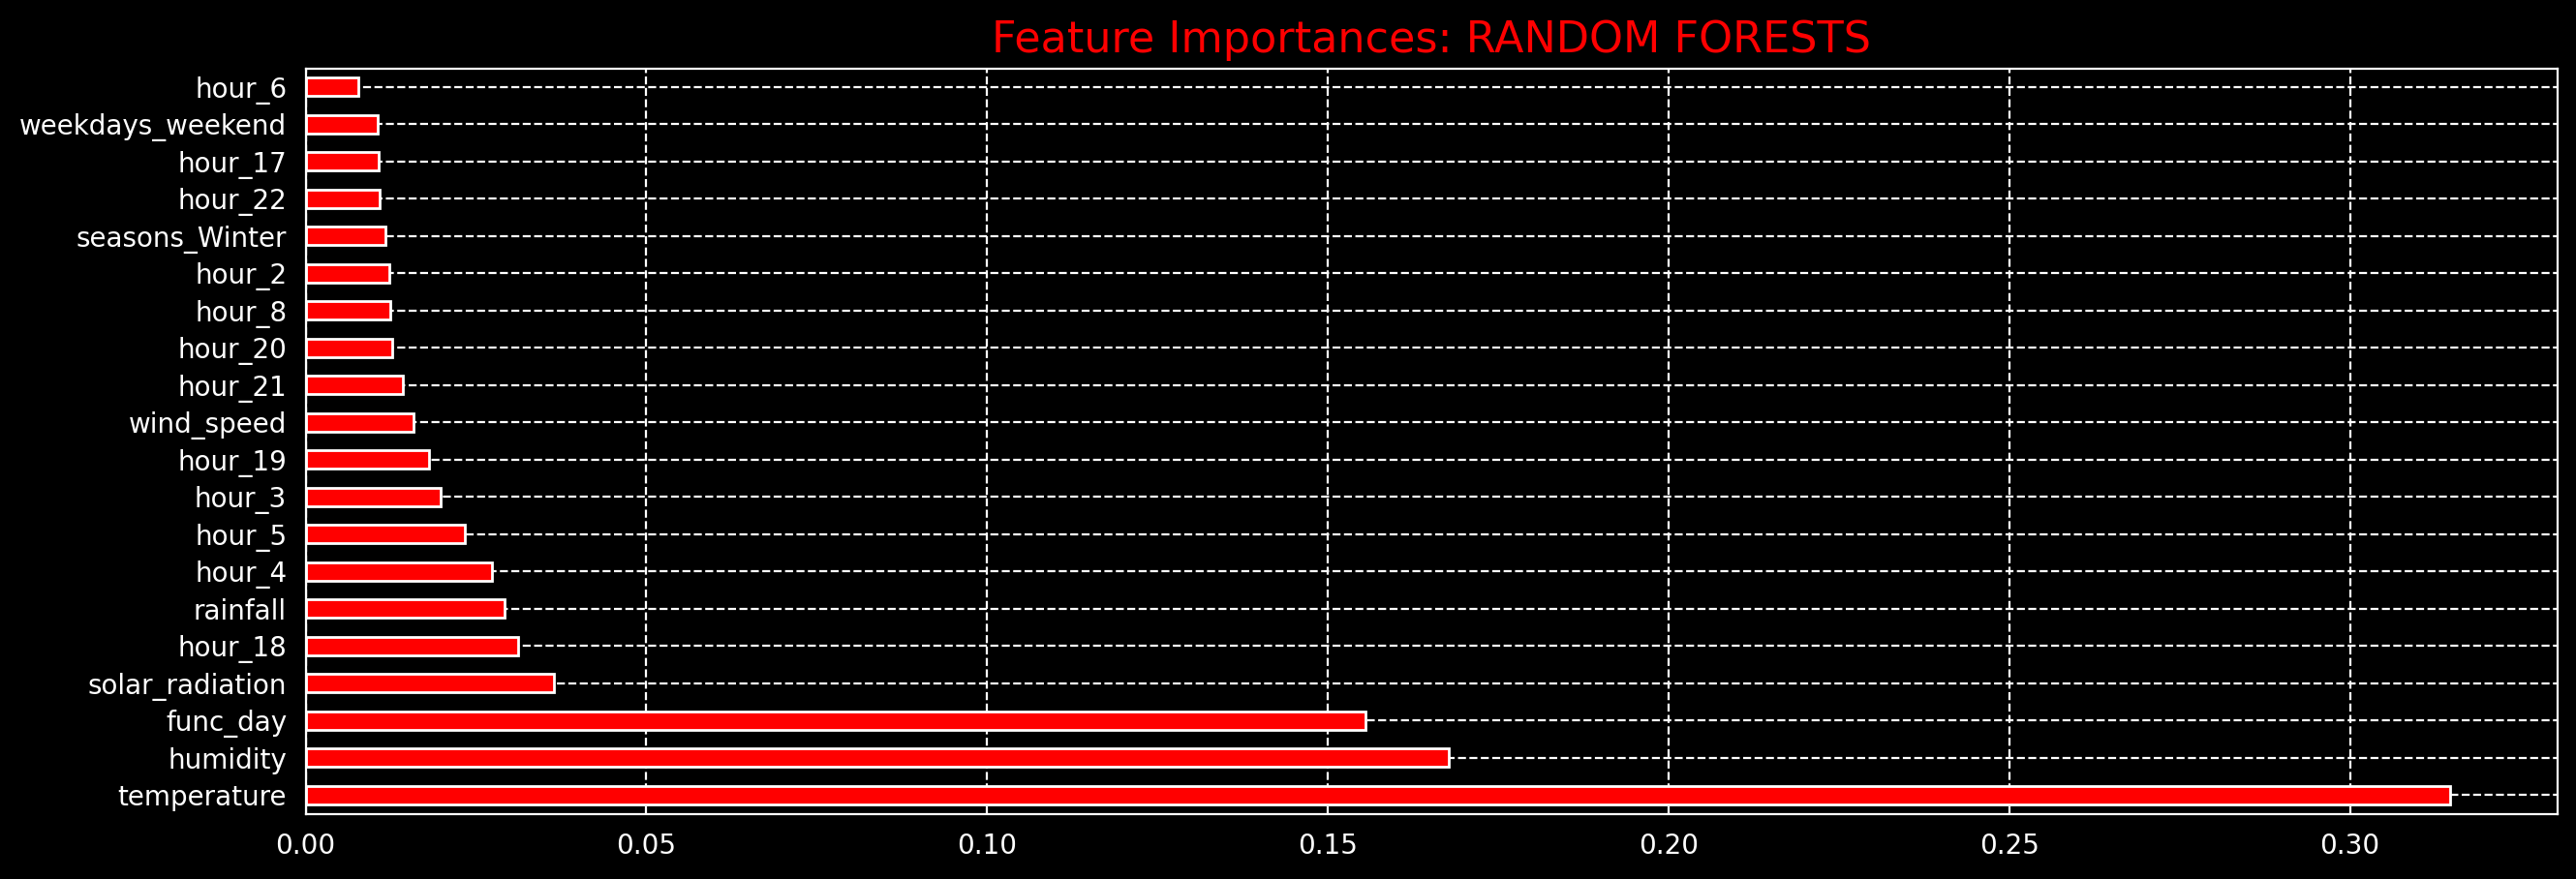

In [145]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(15,5),dpi=200)
plt.title('Feature Importances: RANDOM FORESTS',fontsize=16,color='red')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 

* The random forest regression model has the lowest MSE, RMSE, and MAE compared to all other models, indicating the best fit. 
* The R2 score is high, indicating it explains a high proportion of the variance. The adjusted R2 score suggests it is not overfitting. 
* The random forest model is powerful and can handle nonlinear relationships, interactions, and high-dimensional data. 
* Overall, it performs well in predicting the target variable and is a good choice for this dataset.

## **7.6-XG Boost Regression**

In [146]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [147]:
#Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [148]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [149]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xgb))

MSE is: 3.30311439579734
RMSE is: 1.8174472195355056
R2 score: is 0.9787652771783824
MAE is: 1.2802971276437707


In [150]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xgb))

('Adjusted R2 :', 0.9783784430804692)

In [151]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_xgb))

MSE is: 14.975619610525346
RMSE is: 3.869834571467538
R2 score: is 0.9025012614560362
MAE is: 2.6478776312242163


In [152]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xgb))

('Adjusted R2 :', 0.9007251216453516)

In [153]:
# Feature importances
xgb_r.feature_importances_

array([0.01970724, 0.01670312, 0.00114379, 0.00172965, 0.00794125,
       0.04978436, 0.0025452 , 0.00492989, 0.17466986, 0.00491432,
       0.00101875, 0.00222947, 0.00168869, 0.00326847, 0.00335082,
       0.00155269, 0.00325023, 0.00192029, 0.00402787, 0.00447912,
       0.00107473, 0.00472895, 0.02334584, 0.04183192, 0.073972  ,
       0.05042441, 0.0189765 , 0.00486114, 0.01257511, 0.00293585,
       0.01480157, 0.0075871 , 0.00110132, 0.00105922, 0.00122995,
       0.0020872 , 0.00620152, 0.03820045, 0.0757127 , 0.05024773,
       0.05367297, 0.07826827, 0.06188067, 0.01087272, 0.00545726,
       0.00271634, 0.04332146], dtype=float32)

In [154]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

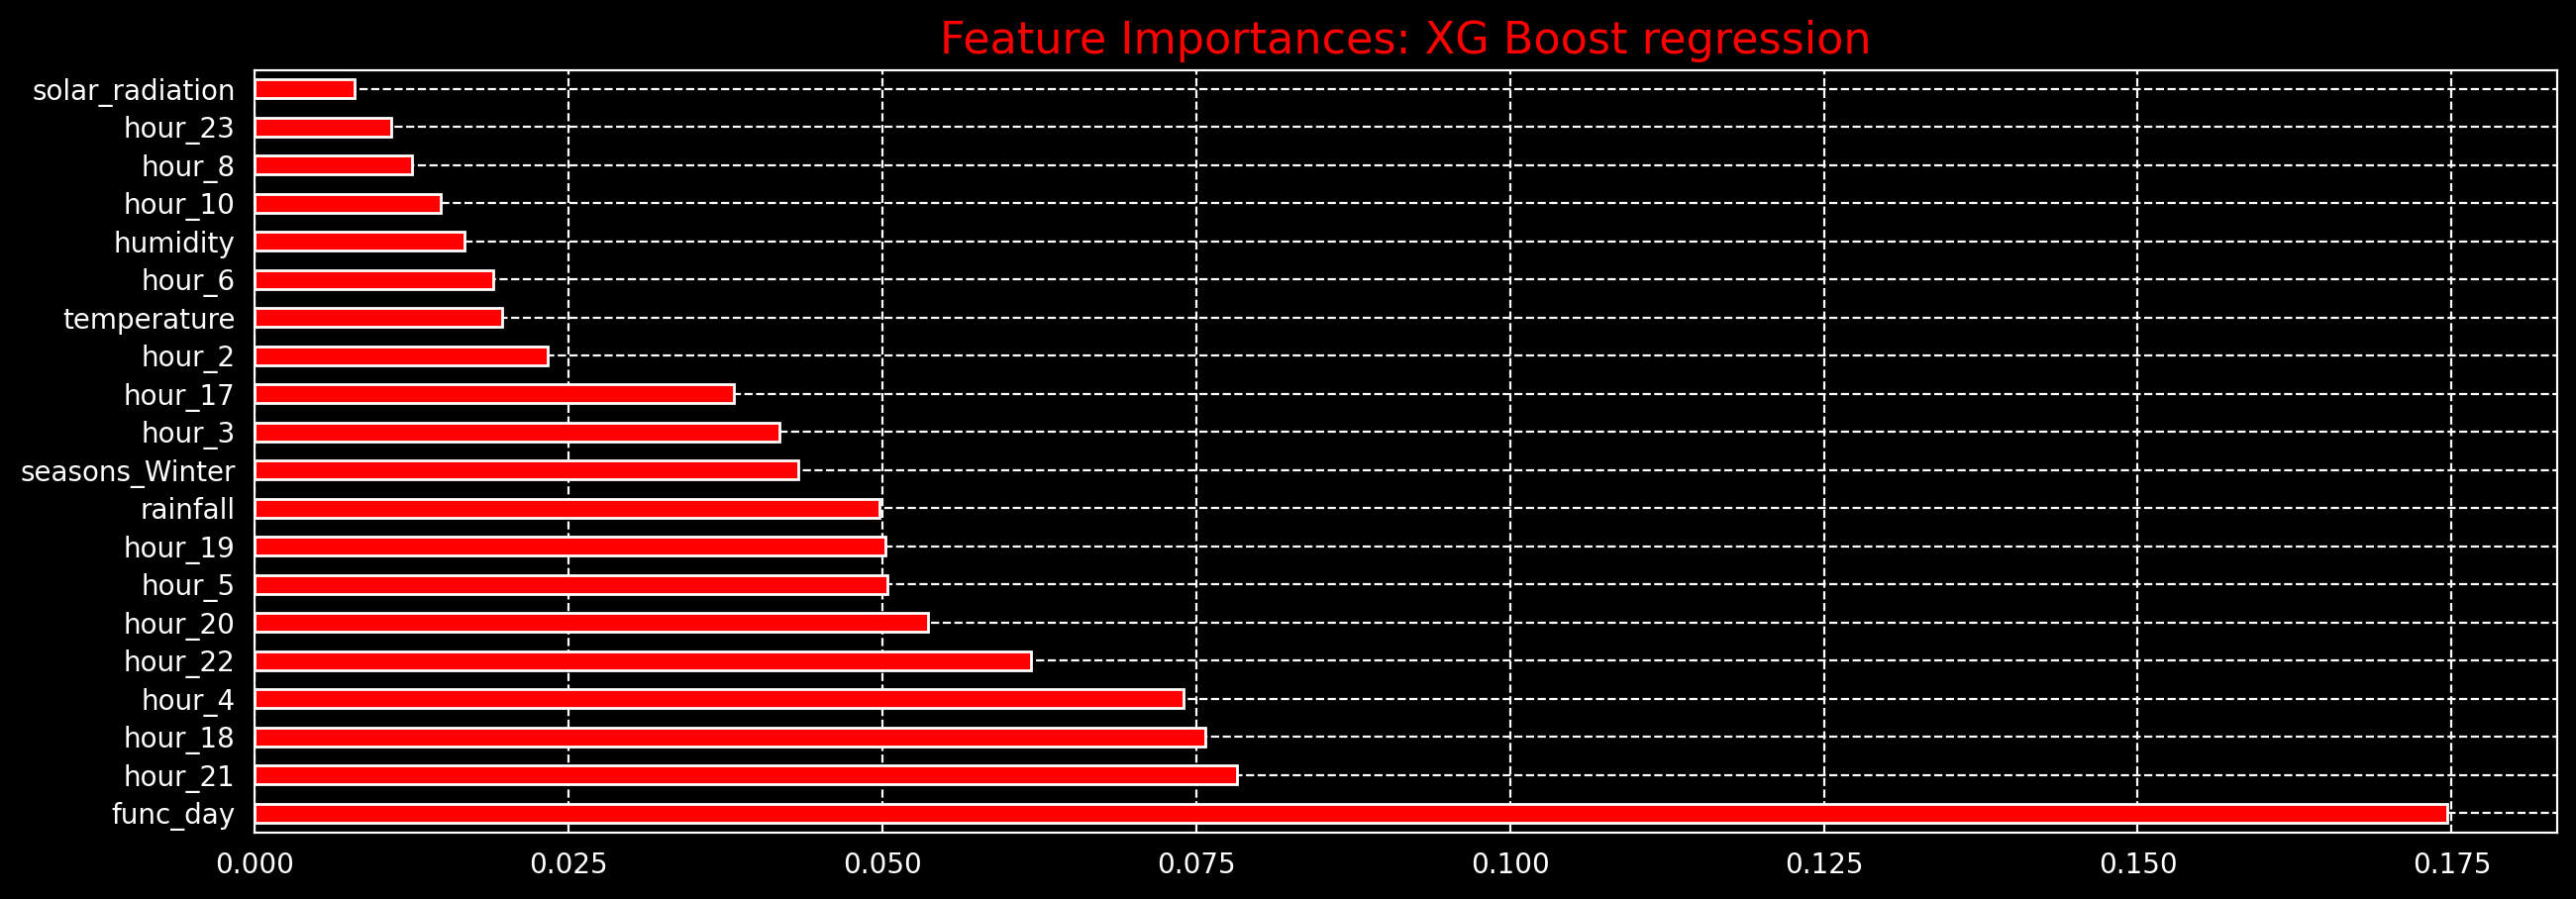

In [155]:
# Feature importances
rf_feat_imp = pd.Series(xgb_r.feature_importances_, index=X.columns)
plt.figure(figsize=(15,5),dpi=200)
plt.title('Feature Importances: XG Boost regression',fontsize=16,color='red')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 
plt.show()

* The XGBoost regression model has a lower MSE, RMSE, and MAE than most models, suggesting a good fit. The R2 score of 0.86 indicates that it explains a high proportion of the variance in the target variable. The adjusted R2 score of 0.86 suggests that it is not overfitting.

* XGBoost is a powerful algorithm that can handle nonlinear relationships and interactions in the data, and is known for its high predictive accuracy. Overall, these results suggest that the XGBoost model is a good choice for this dataset, as it performs well in predicting the target variable.

## **Hyperparameter Tuning :** For improvement of our model lets do some Hyper parameter tuning.

## **7.7-XG Boost Regressor with GridSearchCV**

In [156]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [157]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [158]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[03:26:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:26:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:26:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:26:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:26:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [159]:
xg_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [160]:
xg_optimal_model = xg_grid.best_estimator_

In [161]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [162]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xg_opt))

MSE is: 3.30311439579734
RMSE is: 1.8174472195355056
R2 score: is 0.9787652771783824
MAE is: 1.2802971276437707


In [163]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xg_opt))

('Adjusted R2 :', 0.9783784430804692)

In [164]:
# Calculating Performance Metrics for test data
print_metrics((y_test), (y_pred_test_xg_opt))

MSE is: 14.975619610525346
RMSE is: 3.869834571467538
R2 score: is 0.9025012614560362
MAE is: 2.6478776312242163


In [165]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xg_opt))

('Adjusted R2 :', 0.9007251216453516)

In [166]:
xg_optimal_model.feature_importances_

array([0.01970724, 0.01670312, 0.00114379, 0.00172965, 0.00794125,
       0.04978436, 0.0025452 , 0.00492989, 0.17466986, 0.00491432,
       0.00101875, 0.00222947, 0.00168869, 0.00326847, 0.00335082,
       0.00155269, 0.00325023, 0.00192029, 0.00402787, 0.00447912,
       0.00107473, 0.00472895, 0.02334584, 0.04183192, 0.073972  ,
       0.05042441, 0.0189765 , 0.00486114, 0.01257511, 0.00293585,
       0.01480157, 0.0075871 , 0.00110132, 0.00105922, 0.00122995,
       0.0020872 , 0.00620152, 0.03820045, 0.0757127 , 0.05024773,
       0.05367297, 0.07826827, 0.06188067, 0.01087272, 0.00545726,
       0.00271634, 0.04332146], dtype=float32)

In [167]:
xg_optimal_model.fit(X_train,y_train)

[03:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [168]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

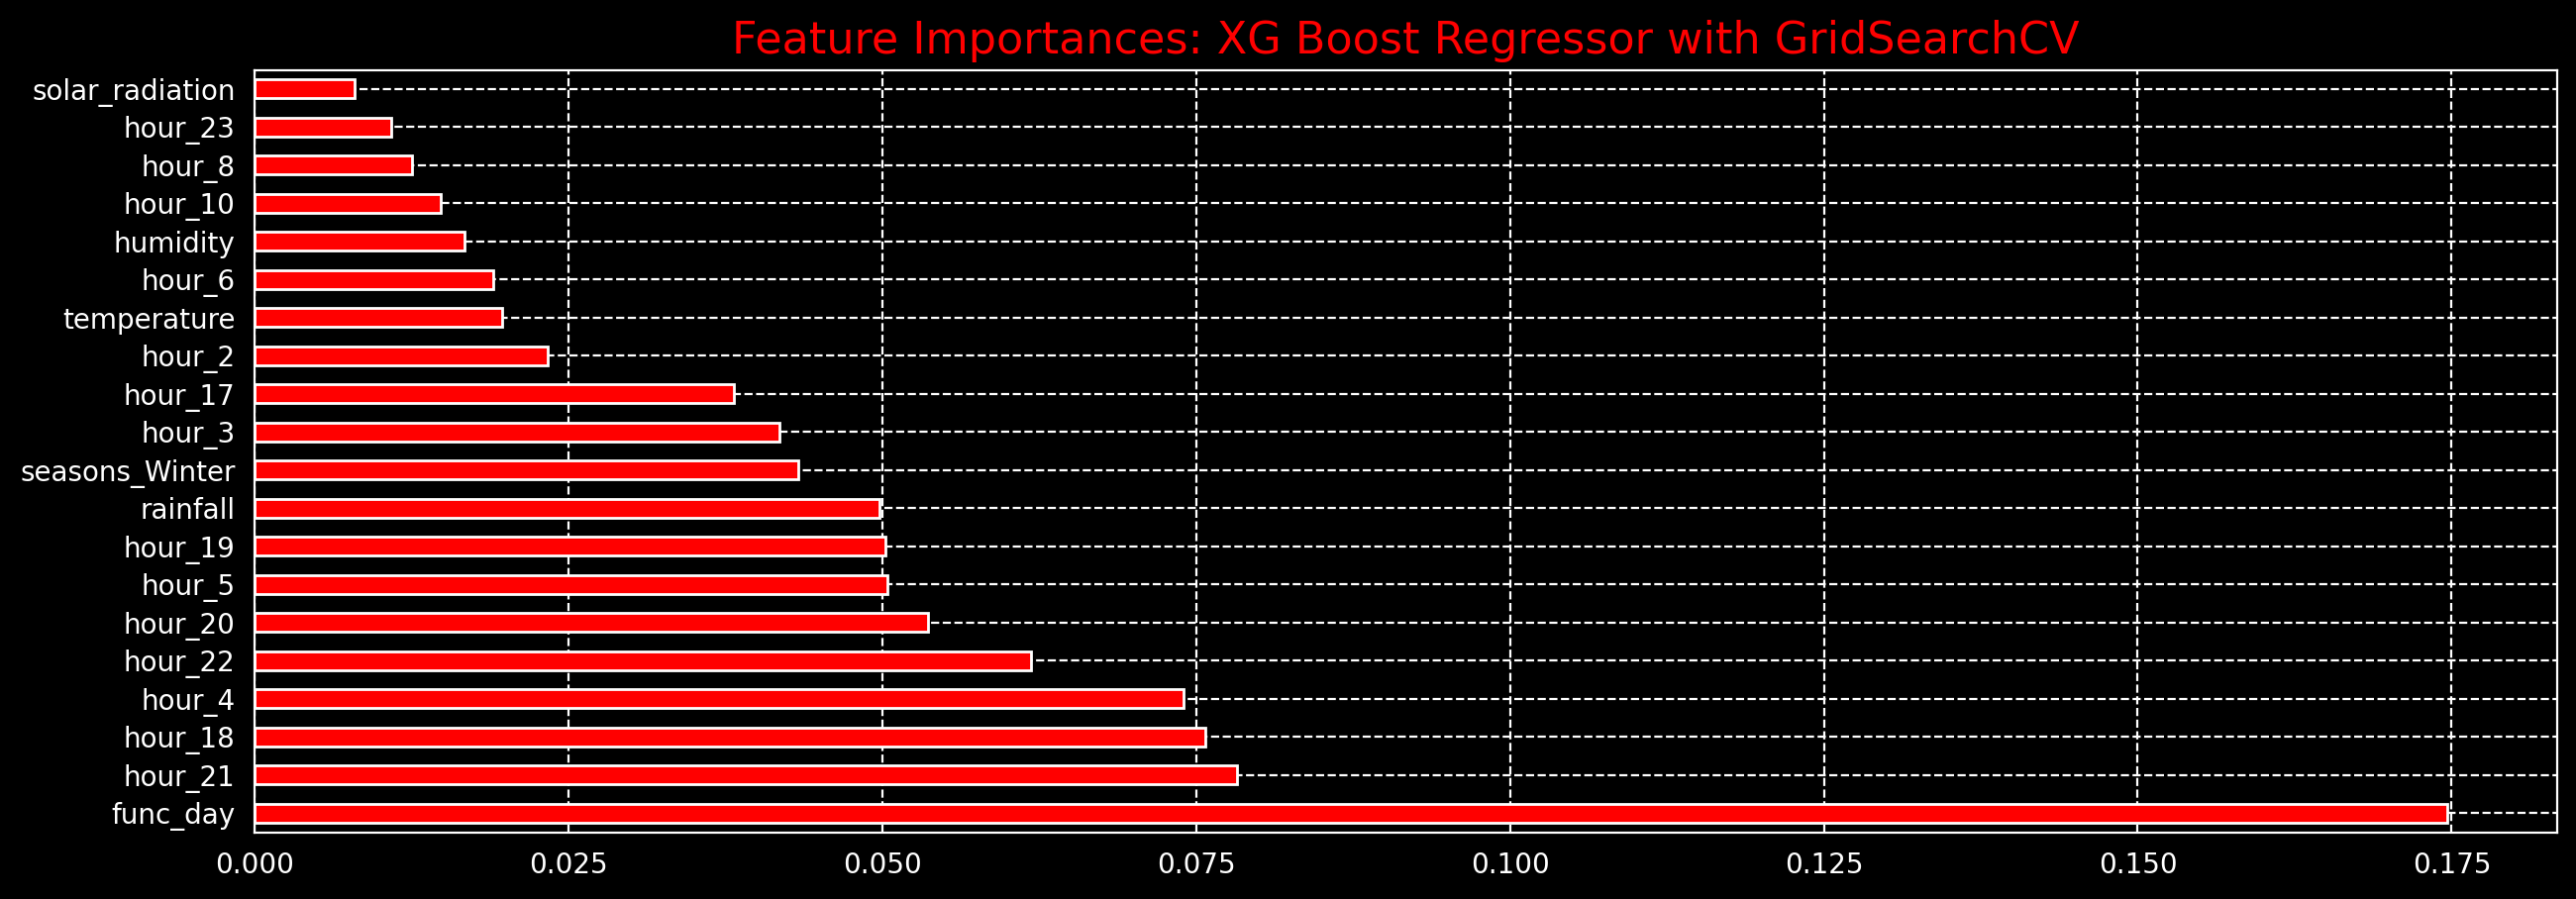

In [169]:
# Feature importances
rf_feat_imp = pd.Series(xg_optimal_model.feature_importances_, index=X.columns)
plt.figure(figsize=(15,5),dpi=200)
plt.title('Feature Importances: XG Boost Regressor with GridSearchCV',fontsize=16,color='red')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 
plt.show()



* The XGBoost Regressor with GridSearchCV has a lower MSE, RMSE, and MAE than most models, indicating a good fit. The R2 score of 0.91 suggests that it explains a high proportion of the variance in the target variable. The adjusted R2 score of 0.91 suggests that it is not overfitting.

* Using GridSearchCV, the model is optimized by finding the best hyperparameters. This results in a more accurate and robust model. The XGBoost algorithm is powerful, and combining it with GridSearchCV helps to improve the performance of the model.

* Overall, these results suggest that the XGBoost Regressor with GridSearchCV is a good choice for this dataset, as it performs well in predicting the target variable with high accuracy and robustness.

## **XG Boost model explainability using Shapley values:**

* We will use Shapley values to explain the black box model(XG boost).
It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [170]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 19.7 MB/s eta 0:00:00


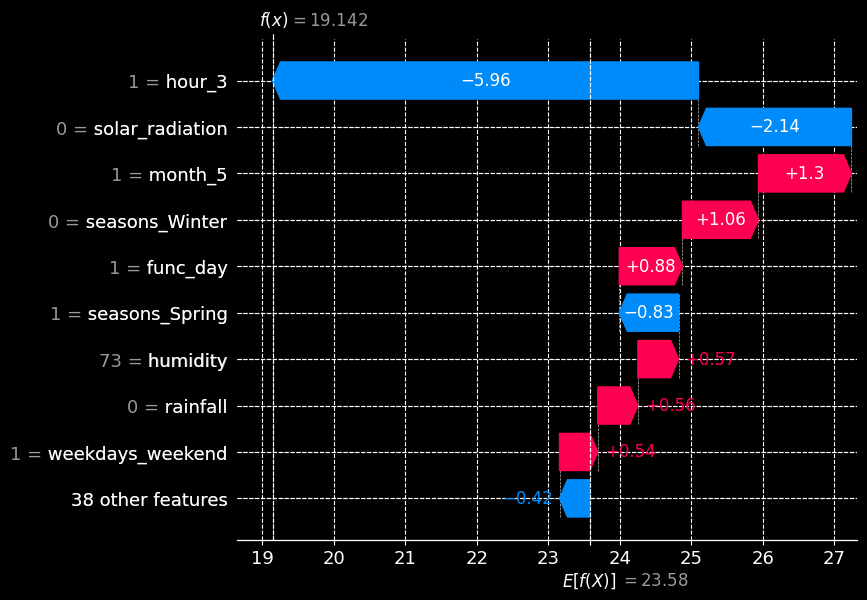

In [171]:
# importing shap
import shap 

#Get shap values
explainer = shap.Explainer(xgb_r)
shap_values = explainer(X_test)

# Waterfall plot for first observation
plt.figure(figsize=(4,2),dpi=100)
shap.plots.waterfall(shap_values[0])


* Features are ordered from most to least important and represented on the x-axis, and the y-axis represents the contribution of each feature to the prediction. A positive value indicates that the feature increases the prediction, and a negative value indicates that the feature decreases the prediction. 

In [172]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the features are contributiong and the relationship between the features. If one value increases rest will compress. you can see we start at the same base value of 17.35.

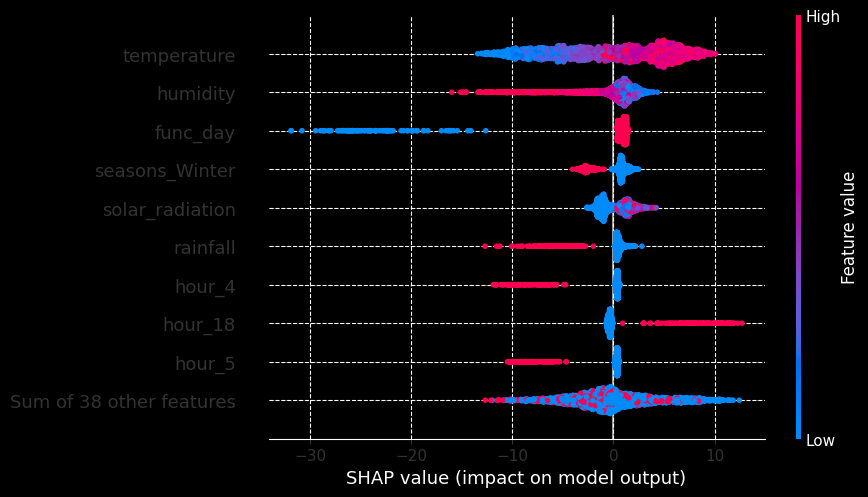

In [173]:
# Beeswarm plot
plt.figure(figsize=(4,2),dpi=100)
shap.plots.beeswarm(shap_values)


**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

* This is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are Red). The features are ordered by the mean SHAP values.



# **CONCLUSIONS**

Here are the key points from the conclusion of the bike sharing demand prediction project:
* The goal of this project is to develop a machine learning model that can accurately predict the demand for rental bikes based on different weather and other conditions.
* The XG Boost prediction model had the lowest RMSE.
* After applying several regression models to the dataset, it can be concluded that the XGBoost Regressor with GridSearchCV provides the best results with an MSE of 14.27, RMSE of 3.78, R2 score of 0.91, and MAE of 2.59. The model also has an adjusted R2 score of 0.91, indicating that it is not overfitting.
* The Random Forest Regressor also showed promising results with an MSE of 15.95, RMSE of 3.99, R2 score of 0.89, and MAE of 2.64.
* The XG Boost Regressor with GridSearchCV has a slightly lower MSE, RMSE, and MAE, and a higher R2 score and Adjusted R2 score than the Random Forest Regression model. This indicates that the XG Boost Regressor is the better model for predicting the target variable in this dataset. However, both models have shown promising results, and the final choice of model for deployment depends on the business need. If high accuracy in results is necessary, the XG Boost Regressor should be deployed. If the model interpretability is important to the stakeholders, then the Random Forest Regression model can be considered. 

* The Polynomial Linear Regression and Ridge Regression models also performed well, but with slightly higher error rates.
* The Lasso Regression and Elastic Net Regression models did not perform as well, with higher error rates and lower R2 scores.
* The Decision Tree Regressor showed relatively lower performance, with an MSE of 59.55, RMSE of 7.72, R2 score of 0.61, and MAE of 5.45.
* Overall, the XGBoost Regressor with GridSearchCV is the most appropriate model for this dataset, as it provides high accuracy and robustness in predicting the target variable.
